#Web Scrapping

In [ ]:
import selenium
import pandas as pd
from selenium import webdriver
import warnings
warnings.filterwarnings("ignore")
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException
from selenium.webdriver.common.by import By
import time

In [ ]:
driver=webdriver.Chrome(r"C:\Users\RedPr\Downloads\chromedriver_win32\chromedriver.exe")

In [ ]:
usedcar=["https://www.carwale.com/used/"]
for i in usedcar:
    driver.get(i)

- Access carswale website.

In [ ]:
hatchbacks=driver.find_element(By.XPATH,'/html/body/div[12]/div[1]/section[9]/div[1]/div[1]/div/div/a[4]')
hatchbacks.click()


- Access hatchback webpage using the url link located in the middle of the website.

In [ ]:
loc=driver.find_element(By.XPATH,'//img[@alt="Mumbai"]')
loc.click()

- Select Mumbai from popup loaction.


In [ ]:
links=[]

In [ ]:
from selenium.common.exceptions import ElementClickInterceptedException
from selenium.common.exceptions import TimeoutException
def link():
    PAUSE_TIME = 0.5
    timeout=3
    last_height = driver.execute_script("return document.body.scrollHeight")
    for i in range(1,90):
        try:
            a=driver.find_element(By.XPATH,'//select[@id="drpCity"]')
            a.click()
        except ElementClickInterceptedException as e:
            driver.implicitly_wait(15)
            a=driver.find_element(By.XPATH,'//select[@id="drpCity"]')
            a.click()
        
        try:
            b=driver.find_element(By.XPATH,f'//option[@value="{i}"]')
            b.click()
        except NoSuchElementException as e:
            continue
        while True:
            driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
            time.sleep(PAUSE_TIME)
        
            url=driver.find_elements(By.XPATH,'//a[@id="linkToDetails"]')
            for k in url[0:]:
                time.sleep(PAUSE_TIME)
                try:
                    if k.get_attribute('href') not in links:
                        links.append(k.get_attribute('href'))
                except StaleElementReferenceException  as e:
                    continue
                except TimeoutException as e:
                    driver.implicitly_wait(15)
                    if k.get_attribute('href') not in links:
                        links.append(k.get_attribute('href'))
                    
                    

            new_height = driver.execute_script("return document.body.scrollHeight")
            if new_height == last_height:
                break
            last_height = new_height

- Create method to extract all the url of cars available on the webpage by scrolling the result page.



In [ ]:
link()

- Call the method to extract all the url of cars available on the webpage by scrolling the result page.



In [ ]:
for i in usedcar:
    driver.get(i)


- Reaccess carswale used car web page.



In [ ]:

sedan=driver.find_element(By.XPATH,'/html/body/div[12]/div[1]/section[9]/div[1]/div[2]/div/div/a[4]')
sedan.click()



- Access sedan url page using link located in the middle of the website.


In [ ]:
loc=driver.find_element(By.XPATH,'//img[@alt="Mumbai"]')
loc.click()


- Select Mumbai from popup loaction.


In [ ]:
link()

- Call the method to extract all the url of cars available on the webpage by scrolling the result page.




In [ ]:
for i in usedcar:
    driver.get(i)

In [ ]:
suv=driver.find_element(By.XPATH,'/html/body/div[12]/div[1]/section[9]/div[1]/div[3]/div/div/a[4]')
suv.click()



- Access suv url page using link located in the middle of the website.



In [ ]:
loc=driver.find_element(By.XPATH,'//img[@alt="Mumbai"]')
loc.click()



- Select Mumbai from popup loaction.


In [ ]:
link()



- Call the method to extract all the url of cars available on the webpage by scrolling the result page.


In [ ]:
from selenium.common.exceptions import ElementClickInterceptedException
b=[]
k=0
for i in links:
    try:
        driver.get(i)
        b.append('xyzabc')
        det=driver.find_elements(By.XPATH,'//h1[@title]')
        for i in det:
            b.append(i.text)
        det=driver.find_elements(By.XPATH,'//div[@class="equal-width dark-text"]')
        for i in det:
            b.append(i.text)
        specifications=driver.find_element(By.XPATH,'//li[@data-tabs="specifications"]')
        specifications.click()
        dimension=driver.find_element(By.XPATH,'//span[text()="Dimensions & Weight"]')
        dimension.click()
        capacity=driver.find_element(By.XPATH,'//span[text()="Capacity"]')
        capacity.click()
        det=driver.find_elements(By.XPATH,'//div[@class="property-details"]')
        for i in det:
            if i.text!='':
                b.append(i.text)
        b.append(k)
        k=k+1
    except NoSuchElementException as e:
        continue

- After collecting all the url from result page, access each stored url to extract all the used cars details from each webpage.

In [ ]:
dim1, dim2 = (1, k) 
arr = [[0 for i in range(dim1)] for j in range(dim2)] 

- Create 2d array to store all the collected car details.

In [ ]:


j=0
k=0
arr[0][0]=b[0]
k=k+1
for i in b[1:]:
    if i=='xyzabc':
        j=j+1
        k=0
        arr[j].insert(k,i)
    else:
        arr[j].insert(k,i)
        
    k=k+1

- Separate each webpage details in 2d array.

In [ ]:
cc=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'cc' in arr[i][j]:
                b=arr[i][j].index('c')
                cc.append(arr[i][j][:b])
                break
            elif arr[i][j]==arr[i][-2]:
                cc.append('-')
                break


- Collect engine details of all the cars and store it in list.

In [ ]:
p=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'Lakh' in arr[i][j]:
                p.append(arr[i][j][1:-4])
                break
            elif arr[i][j]==arr[i][-2]:
                p.append('-')
                break


- Collect price details of all the cars and store it in list.

In [ ]:
name=[]
brand=[]
price=[]
year=[]
month=[]
km=[]
fuel=[]
ty=[]
lo=[]
ar=[]
own=[]
ind=[]
ins=[]
ex=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
          if len(arr[i])>3:
                name.append(arr[i][1][4:].split()[1:])
                brand.append(arr[i][1][4:].split()[0].replace("MINI","JCW").replace("Land","Land Rover").replace("Maruti","Maruti Suzuki"))
                price.append(arr[i][2][1:-4])
                year.append(arr[i][3][-4:])
                month.append(arr[i][3][:-4])
                km.append(arr[i][4][:-4])
                fuel.append(arr[i][5])
                ty.append(arr[i][6])
                lo.append(arr[i][7].replace(","," ").split()[-1])
                ar.append(arr[i][7].replace(","," ").split()[:-1])
                own.append(arr[i][10])
                ind.append(arr[i][14])
                if len(arr[i][13])>17:
                  ins.append(arr[i][13][:-19])
                  ex.append(arr[i][13][-16:])
                  break
                else:
                  ins.append(arr[i][13])
                  ex.append('-')
                  break
          else:
                name.append('-')
                brand.append('-')
                price.append('-')
                year.append('-')
                month.append('-')
                km.append('-')
                fuel.append('-')
                ty.append('-')
                lo.append('-')
                own.append('-')
                ind.append('-')
                ins.append('-')
                ex.append('-')
                break

- Collect name, manufacture year, insurance type etc details of all the cars and store it in list.

In [ ]:
mt=[]
for i in name:
    mt.append(",".join(i).replace("Cooper","Mini Cooper").replace(","," ").replace("Rover","").replace("Suzuki",""))
a=[]
for i in ar:
    a.append(",".join(i).replace(","," "))

In [ ]:
bhp=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'bhp' in arr[i][j] and 'Nm' in arr[i][j]:
                bhp.append(arr[i][j][:3])
                break
            elif 'bhp @' in arr[i][j]:
                b=arr[i][j].index('@')
                bhp.append(arr[i][j][:b-4])
                break
            elif '@' in arr[i][j]:
                b=arr[i][j].index('@')
                bhp.append(arr[i][j][:b-4])
                break
            elif arr[i][j]==arr[i][-2]:
                bhp.append('-')
                break


- Collect max power details of all the cars and store it in list.

In [ ]:
n=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'Nm' in arr[i][j]:
                n.append(arr[i][j][:3])
                break
            elif 'bhp' in arr[i][j] and 'Nm' in arr[i][j]:
                n.append(arr[i][j][-6:-2])
                break
            elif '@' in arr[i][j]:
                b=arr[i].index(arr[i][j])
                if '@' in arr[i][b+1]:
                    n.append(arr[i][b+1][:3])
                    break
            elif arr[i][j]==arr[i][-2]:
                n.append('-')
                break
                
nm=[]
for i in n:
    if i[-1]=='@':
        nm.append(i[:-1])
    else:
        nm.append(i)

- Collect max torque details of all the cars and store it in list.

In [ ]:
kmpl=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'kmpl' in arr[i][j]:
                kmpl.append(arr[i][j][:-5])
                break
            elif arr[i][j]==arr[i][-2]:
                kmpl.append('-')
                break


- Collect mileage details of all the cars and store it in list.

In [ ]:
lg=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'mm' in arr[i][j] and len(arr[i][j])<8 :
                lg.append(arr[i][j][:-3])
                break
            elif arr[i][j]==arr[i][-2]:
                lg.append('-')
                break


- Collect length details of all the cars and store it in list.

In [ ]:
wt=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'mm' in arr[i][j]:
                if 'mm' in arr[i][j+1]:
                    wt.append(arr[i][j+1][:-3])
                    break
                else:
                    wt.append('-')
                    break
            elif arr[i][j]==arr[i][-2]:
                wt.append('-')
                break


- Collect width details of all the cars and store it in list.

In [ ]:
ht=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'mm' in arr[i][j]:
                if 'mm' in arr[i][j+2]:
                    ht.append(arr[i][j+2][:-3])
                    break
                else:
                    ht.append('-')
                    break
            elif arr[i][j]==arr[i][-2]:
                ht.append('-')
                break


- Collect height details of all the cars and store it in list.

In [ ]:
wb=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'mm' in arr[i][j]:
                if 'mm' in arr[i][j+3]:
                    wb.append(arr[i][j+3][:-3])
                    break
                else:
                    wb.append('-')
                    break
            elif arr[i][j]==arr[i][-2]:
                wb.append('-')
                break

- Collect wheelbase details of all the cars and store it in list.

In [ ]:
gc=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'mm' in arr[i][j]:
                if 'mm' in arr[i][j+4]:
                    gc.append(arr[i][j+4][:-3])
                    break
                else:
                    gc.append('-')
                    break
            elif arr[i][j]==arr[i][-2]:
                gc.append('-')
                break

- Collect ground clearance details of all the cars and store it in list.

In [ ]:
wg=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'kg' in arr[i][j]:
                wg.append(arr[i][j][:-2])
                break
            elif arr[i][j]==arr[i][-2]:
                wg.append('-')
                break


- Collect weight details of all the cars and store it in list.

In [ ]:
door=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'Doors' in arr[i][j]:
                door.append(arr[i][j][:-6])
                break
            elif arr[i][j]==arr[i][-2]:
                door.append('-')
                break


- Collect number of door details of all the cars and store it in list.

In [ ]:
person=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'Person' in arr[i][j]:
                if len(arr[i][j])>8:
                    person.append(arr[i][j][:2])
                    break
                else:
                    person.append(arr[i][j][:-6])
                    break
            elif arr[i][j]==arr[i][-2]:
                person.append('-')
                break


- Collect number of capacity of all the cars and store it in list.

In [ ]:
r=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'Rows' in arr[i][j]:
                r.append(arr[i][j][:-4])
                break
            elif arr[i][j]==arr[i][-2]:
                r.append('-')
                break


- Collect number of rows details of all the cars and store it in list.

In [ ]:
l=[]
for i in range(len(arr)):
    if len(arr[i])!=1:
        for j in range(len(arr[i])):
            if 'litres' in str(arr[i][j]):
                if len(arr[i][j][:-6])==4:
                    if type(arr[i][j+1])==int:
                        l.append('-')
                        break
                        
                    elif 'litres' in arr[i][j+1]:
                        l.append(arr[i][j+1][:-6])
                        break
                        
                    else:
                        l.append('-')
                        break
                else:
                    l.append(arr[i][j][:-6])
                    break
                    
            elif arr[i][j]==arr[i][-2]:
                l.append('-')
                break
len(l)

- Collect fuel capacity details of all the cars and store it in list.

In [ ]:
df=pd.DataFrame({'Engine (cc)':cc, 'Max Power (bhp)':bhp, 'Max Torque (Nm)':nm, 'Mileage (kmpl)':kmpl,
       'Length (mm)':lg, 'Width (mm)':wt, 'Height (mm)':ht, 'WheelBase(mm)':wb,
       'Ground Clearance (mm)':gc, 'Kerb Weight (kg)':wg, 'Doors':door,
       'Seating Capacity (Persons)':person, 'Seating Rows':r, 'Fuel Capacity (litres)':l,
       'Model Name':mt, 'Price (Lakh)':price, 'Distance Travelled (km)':km, 'Fuel Type':fuel,
       'Transmission':ty, 'Previous Owners':own, 'Insurance Type':ins,
       'Registration Type':ind, 'Color':, 'Manufacturing Month':month,
       'Manufacturing Year':year, 'Brand':brand, 'City':loc, 'Area':a})

- Create a dataframe to store all details.

#ML 

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("C:\\Users\\RedPr\\Downloads\\ucds.csv")

#Importing Dataset

In [ ]:
df.head()

Unnamed: 0  Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0.1.1 Engine (cc)  \
0           0             0             0               0        1197   
1           1             1             1               1        1199   
2           2             2             2               2         998   
3           3             3             3               3        1197   
4           4             4             4               4        1198   

  Max Power (bhp) Max Torque (Nm) Mileage (kmpl) Length (mm) Width (mm)  ...  \
0             83              115           20.4        3850       1695  ...   
1             89              110           17.1        3989       1694  ...   
2             67              90            23.1        3600       1600  ...   
3             79              112          20.63        3585       1595  ...   
4             87              109           19.4        3610       1680  ...   

  Transmission Previous Owners  Insurance Type Registration Type   Color  \
0       Manual           First   Comprehensive        Individual    Grey   
1    Automatic           First  Comprehensive         Individual    Grey   
2    Automatic           First   Not Available        Individual   White   
3       Manual           First    Third Party         Individual  Silver   
4       Manual           First   Not Available        Individual   White   

  Manufacturing Month Manufacturing Year          Brand    City  \
0                Jun                2020  Maruti Suzuki  Mumbai   
1                Sep                2021          Honda  Mumbai   
2                Jun                2016  Maruti Suzuki  Mumbai   
3                Dec                2014        Hyundai  Mumbai   
4                Jun                2015          Honda  Mumbai   

             Area  
0  Kandivali West  
1       Khar West  
2  Kandivali West  
3          Kalina  
4  Kandivali West  

[5 rows x 32 columns]

In [ ]:
df.shape

(5099, 32)

- Dataset has 7043 rows and 21 columns

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Engine (cc)', 'Max Power (bhp)', 'Max Torque (Nm)', 'Mileage (kmpl)',
       'Length (mm)', 'Width (mm)', 'Height (mm)', 'WheelBase(mm)',
       'Ground Clearance (mm)', 'Kerb Weight (kg)', 'Doors',
       'Seating Capacity (Persons)', 'Seating Rows', 'Fuel Capacity (litres)',
       'Model Name', 'Price (Lakh)', 'Distance Travelled (km)', 'Fuel Type',
       'Transmission', 'Previous Owners', 'Insurance Type',
       'Registration Type', 'Color', 'Manufacturing Month',
       'Manufacturing Year', 'Brand', 'City', 'Area'],
      dtype='object')

In [ ]:
df.columns[28]

'Manufacturing Year'

In [ ]:
print(df[df["Manufacturing Year"]==1899].index.values)

[3165]


In [ ]:
df["Manufacturing Year"]=df["Manufacturing Year"].replace(1899,np.nan)

#Checking Null Values

In [ ]:
df.isnull().sum()

Unnamed: 0               0
Unnamed: 0.2             0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
Engine (cc)              0
                      ... 
Manufacturing Month      0
Manufacturing Year       1
Brand                    0
City                     0
Area                   235
Length: 32, dtype: int64

In [ ]:
df.dtypes

Unnamed: 0               int64
Unnamed: 0.2             int64
Unnamed: 0.1             int64
Unnamed: 0.1.1           int64
Engine (cc)             object
                        ...   
Manufacturing Month     object
Manufacturing Year     float64
Brand                   object
City                    object
Area                    object
Length: 32, dtype: object

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0.1.1',
       'Engine (cc)', 'Max Power (bhp)', 'Max Torque (Nm)', 'Mileage (kmpl)',
       'Length (mm)', 'Width (mm)', 'Height (mm)', 'WheelBase(mm)',
       'Ground Clearance (mm)', 'Kerb Weight (kg)', 'Doors',
       'Seating Capacity (Persons)', 'Seating Rows', 'Fuel Capacity (litres)',
       'Model Name', 'Price (Lakh)', 'Distance Travelled (km)', 'Fuel Type',
       'Transmission', 'Previous Owners', 'Insurance Type',
       'Registration Type', 'Color', 'Manufacturing Month',
       'Manufacturing Year', 'Brand', 'City', 'Area'],
      dtype='object')

In [ ]:
l=[]
for j in range(df.shape[1]):
  for i in range(df.shape[0]):
    if df.iloc[i,j]=='-' and i not in l:
      l.append(j)
      break


In [ ]:
l

[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]

In [ ]:
for i in l:
  a=df.columns[i]
  df[a]=df[a].replace("-",np.nan)

In [ ]:
df.isnull().sum()

Unnamed: 0               0
Unnamed: 0.2             0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
Engine (cc)             29
                      ... 
Manufacturing Month      0
Manufacturing Year       1
Brand                    0
City                     0
Area                   235
Length: 32, dtype: int64

In [ ]:
li=["Fuel Type","Transmission","Location","Previous Owners","Insurance Type","Registration Type","Manufacturing Month","Color","Brand",'Model Name','City','Area']      

for i in df:
  if i not in li:
    df[i]=df[i].astype(float)

In [ ]:
df.dtypes

Unnamed: 0             float64
Unnamed: 0.2           float64
Unnamed: 0.1           float64
Unnamed: 0.1.1         float64
Engine (cc)            float64
                        ...   
Manufacturing Month     object
Manufacturing Year     float64
Brand                   object
City                    object
Area                    object
Length: 32, dtype: object

In [ ]:
a=[]
for i in df:
  if df[i].isnull().sum()>0:
    per=df.shape[0]*0.3
    if df[i].isnull().sum()>per:
      a.append(i)
    
for i in a:
  df=df.drop([i],axis=1)
  

In [ ]:
df.isnull().sum()

Unnamed: 0               0
Unnamed: 0.2             0
Unnamed: 0.1             0
Unnamed: 0.1.1           0
Engine (cc)             29
                      ... 
Manufacturing Month      0
Manufacturing Year       1
Brand                    0
City                     0
Area                   235
Length: 32, dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
for i in df:
  if df[i].isnull().sum()>0:
    if df[i].dtypes==object:
      df[i]=imp.fit_transform(df[i].values.reshape(-1,1))
    else:
      df[i]=df[i].fillna(round(df[i].mean()))

In [ ]:
df.isnull().sum()

Unnamed: 0             0
Unnamed: 0.2           0
Unnamed: 0.1           0
Unnamed: 0.1.1         0
Engine (cc)            0
                      ..
Manufacturing Month    0
Manufacturing Year     0
Brand                  0
City                   0
Area                   0
Length: 32, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5099 entries, 0 to 5098
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  5099 non-null   float64
 1   Unnamed: 0.2                5099 non-null   float64
 2   Unnamed: 0.1                5099 non-null   float64
 3   Unnamed: 0.1.1              5099 non-null   float64
 4   Engine (cc)                 5099 non-null   float64
 5   Max Power (bhp)             5099 non-null   float64
 6   Max Torque (Nm)             5099 non-null   float64
 7   Mileage (kmpl)              5099 non-null   float64
 8   Length (mm)                 5099 non-null   float64
 9   Width (mm)                  5099 non-null   float64
 10  Height (mm)                 5099 non-null   float64
 11  WheelBase(mm)               5099 non-null   float64
 12  Ground Clearance (mm)       5099 non-null   float64
 13  Kerb Weight (kg)            5099 

In [ ]:
df["Fuel Type"].unique()

array(['Petrol', 'CNG', 'Diesel', 'Petrol + CNG', 'LPG', 'Electric',
       'Diesel + Diesel', 'Petrol + Petrol', 'CNG + Petrol+Cng',
       'LPG + Petrol+Lpg', 'CNG + CNG', 'Mild Hybrid(Electric + Petrol)',
       'Petrol + Diesel', 'Petrol + LPG', 'Diesel + Petrol',
       'Diesel + CNG', 'Diesel + LPG', 'Hybrid'], dtype=object)

In [ ]:
df["Fuel Type"]=df["Fuel Type"].replace("Diesel + Diesel","Diesel")
df["Fuel Type"]=df["Fuel Type"].replace('Petrol + Petrol','Petrol')
df["Fuel Type"]=df["Fuel Type"].replace('CNG + CNG',"CNG")
df["Fuel Type"]=df["Fuel Type"].replace('CNG + Petrol+Cng','Petrol+CNG')
df["Fuel Type"]=df["Fuel Type"].replace('Petrol+CNG','Petrol + CNG')
df["Fuel Type"]=df["Fuel Type"].replace('Petrol+LPG','Petrol + LPG')
df["Fuel Type"]=df["Fuel Type"].replace('LPG + Petrol+Lpg','Petrol+LPG')
df["Fuel Type"]=df["Fuel Type"].replace('Diesel + Petrol','Petrol + Diesel')

In [ ]:
df["Fuel Type"].unique()

array(['Petrol', 'CNG', 'Diesel', 'Petrol + CNG', 'LPG', 'Electric',
       'Petrol+LPG', 'Mild Hybrid(Electric + Petrol)', 'Petrol + Diesel',
       'Petrol + LPG', 'Diesel + CNG', 'Diesel + LPG', 'Hybrid'],
      dtype=object)

In [ ]:
df["Insurance Type"].unique()

array(['Comprehensive', 'Comprehensive ', 'Not Available', 'Third Party ',
       'Third Party', 'Expired', 'ThirdParty '], dtype=object)

In [ ]:
df["Insurance Type"]=df["Insurance Type"].replace('Comprehensive ','Comprehensive')
df["Insurance Type"]=df["Insurance Type"].replace('Third Party ','Third Party')
df["Insurance Type"]=df["Insurance Type"].replace('ThirdParty ','Third Party')

In [ ]:
df["Insurance Type"].unique()

array(['Comprehensive', 'Not Available', 'Third Party', 'Expired'],
      dtype=object)

#Visualization

Registration Type
Individual       4151
Not Available     834
Corporate         114
Name: Registration Type, dtype: int64


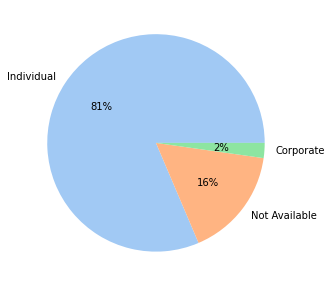

In [ ]:
plt.figure(figsize=(12,5))
month_sold=pd.DataFrame(df["Registration Type"].value_counts())
palette_color = sns.color_palette('pastel')
plt.pie(month_sold,labels=month_sold.index,colors=palette_color, autopct='%.0f%%')
print("Registration Type")
print(df["Registration Type"].value_counts())
plt.show()

Transmission Type
Manual       3241
Automatic    1858
Name: Transmission, dtype: int64


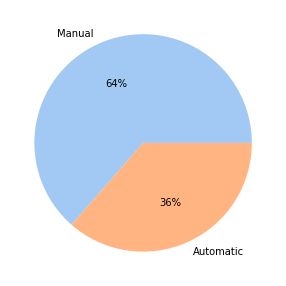

In [ ]:
plt.figure(figsize=(12,5))
month_sold=pd.DataFrame(df["Transmission"].value_counts())
palette_color = sns.color_palette('pastel')
plt.pie(month_sold,labels=month_sold.index,colors=palette_color, autopct='%.0f%%')
print("Transmission Type")
print(df["Transmission"].value_counts())
plt.show()

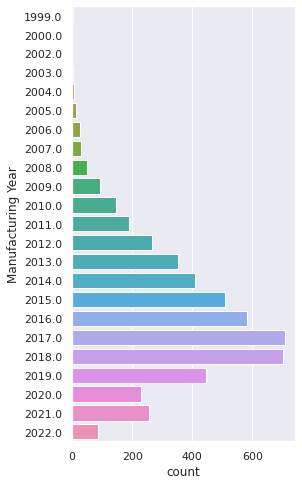

In [ ]:
plt.figure(figsize=(4,8))
sns.countplot(y=df["Manufacturing Year"])

Petrol                            3202
Diesel                            1721
CNG                                 84
Petrol + CNG                        50
Electric                            13
Petrol + LPG                         8
Petrol + Diesel                      5
Diesel + CNG                         5
LPG                                  4
Hybrid                               3
Diesel + LPG                         2
Petrol+LPG                           1
Mild Hybrid(Electric + Petrol)       1
Name: Fuel Type, dtype: int64


First               3799
Second              1071
Third                171
UnRegistered Car      26
4 or More             23
Fourth                 9
Name: Previous Owners, dtype: int64


Comprehensive    2949
Third Party      1039
Not Available     995
Expired           116
Name: Insurance Type, dtype: int64


Jun     3342
Jan      206
May      190
Oct      170
Sep      160
Nov      157
Mar      155
Feb      154
Aug      150
Apr      147
Dec      143
Jul  

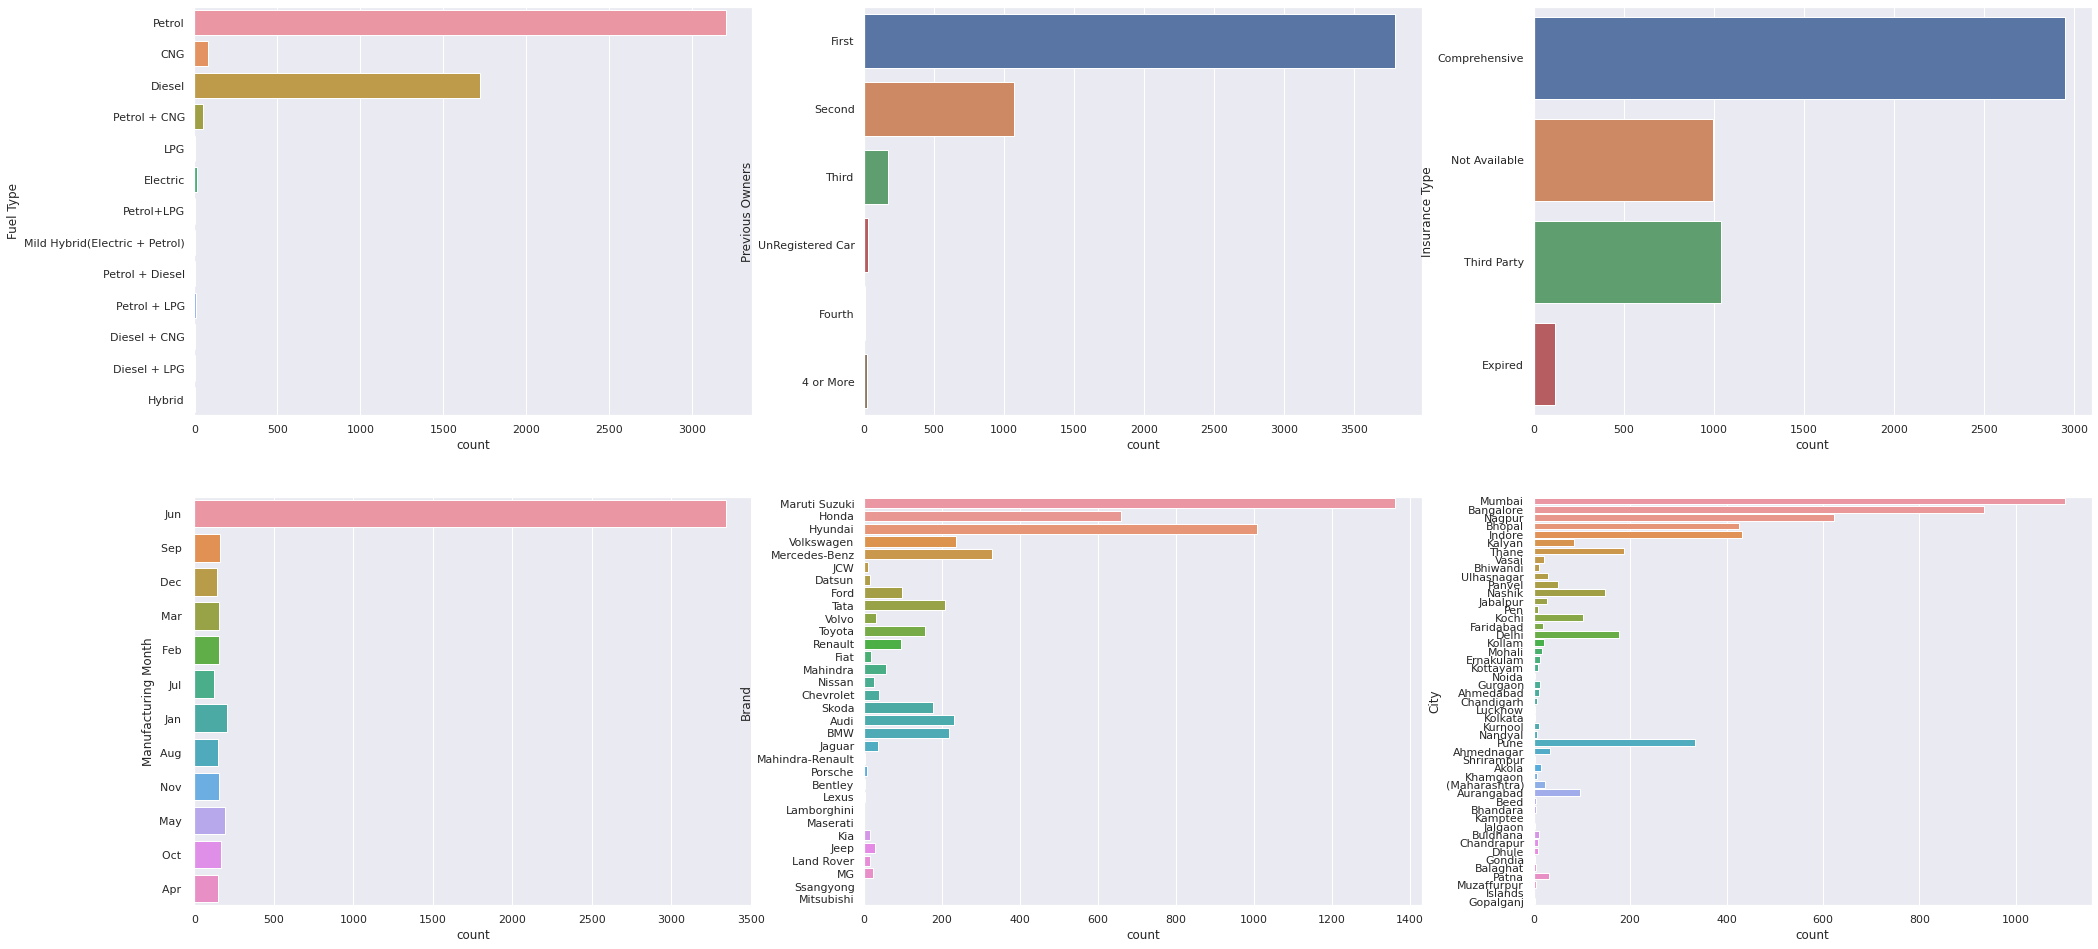

In [ ]:
sns.set()
fig,axes=plt.subplots(2,3,figsize=(34,16))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
list3=["Model Name","Color","Area","Registration Type","Transmission"]
for i in df:
  if df[i].dtypes==object and i not in list3:
    sns.countplot(y=df[i],ax=axes[j,k])
    print(df[i].value_counts())
    print("\n")
    k=k+1

  
  if k==3:
    k=0
    j=j+1

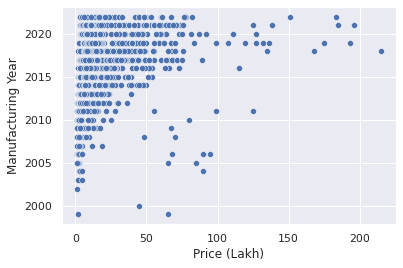

In [ ]:
sns.scatterplot(y=df["Manufacturing Year"],x=df["Price (Lakh)"])

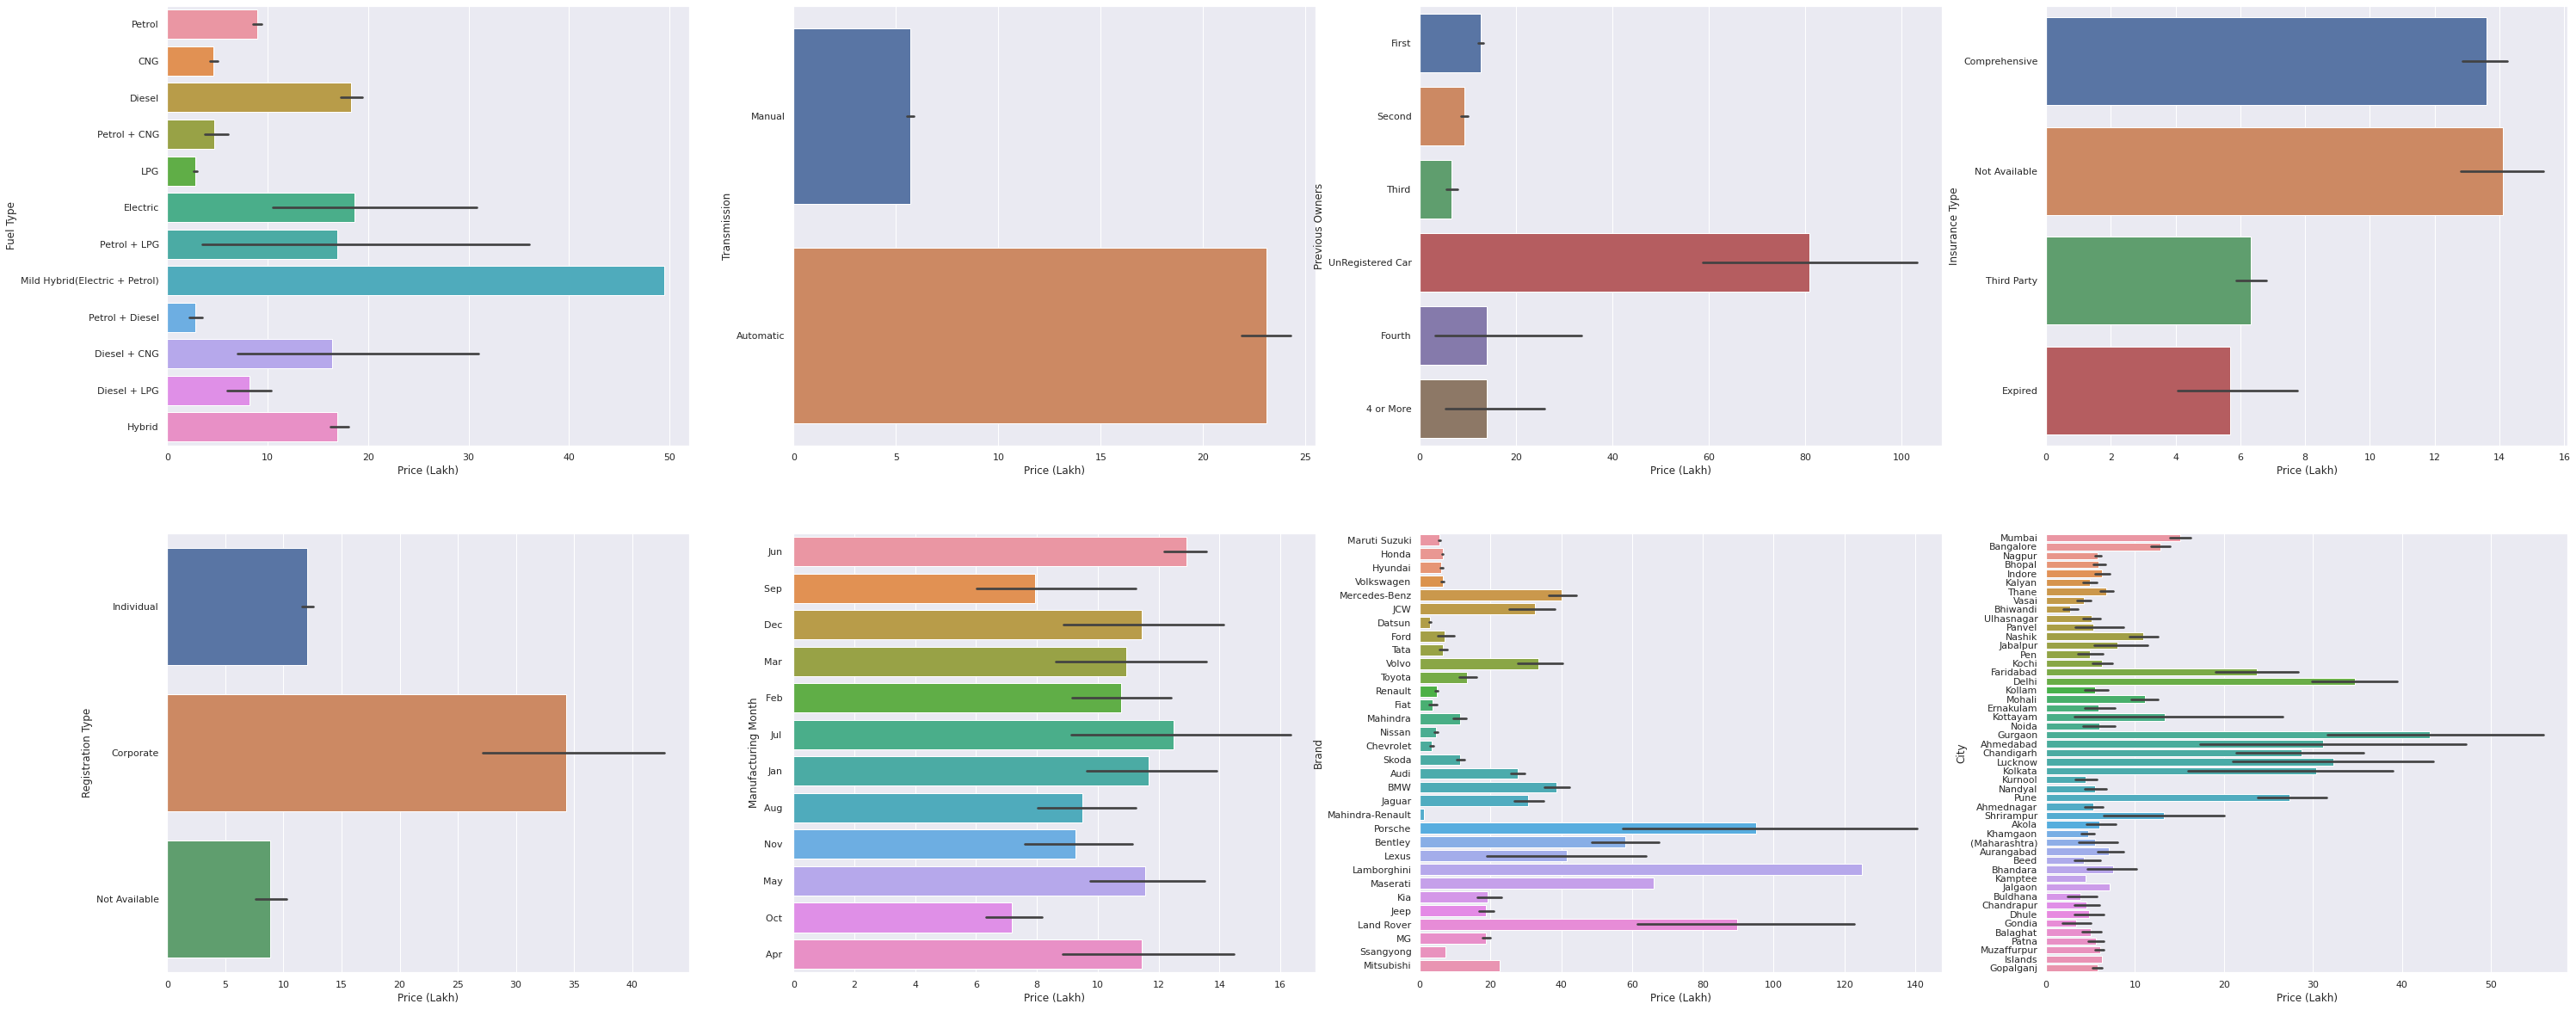

In [ ]:
sns.set()
fig,axes=plt.subplots(2,4,figsize=(50,20))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
list3=["Model Name","Color","Area"]
for i in df:
  if df[i].dtypes==object and i not in list3:
    sns.barplot(y=df[i],x=df["Price (Lakh)"],ax=axes[j,k])
    k=k+1

  
  if k==4:
    k=0
    j=j+1

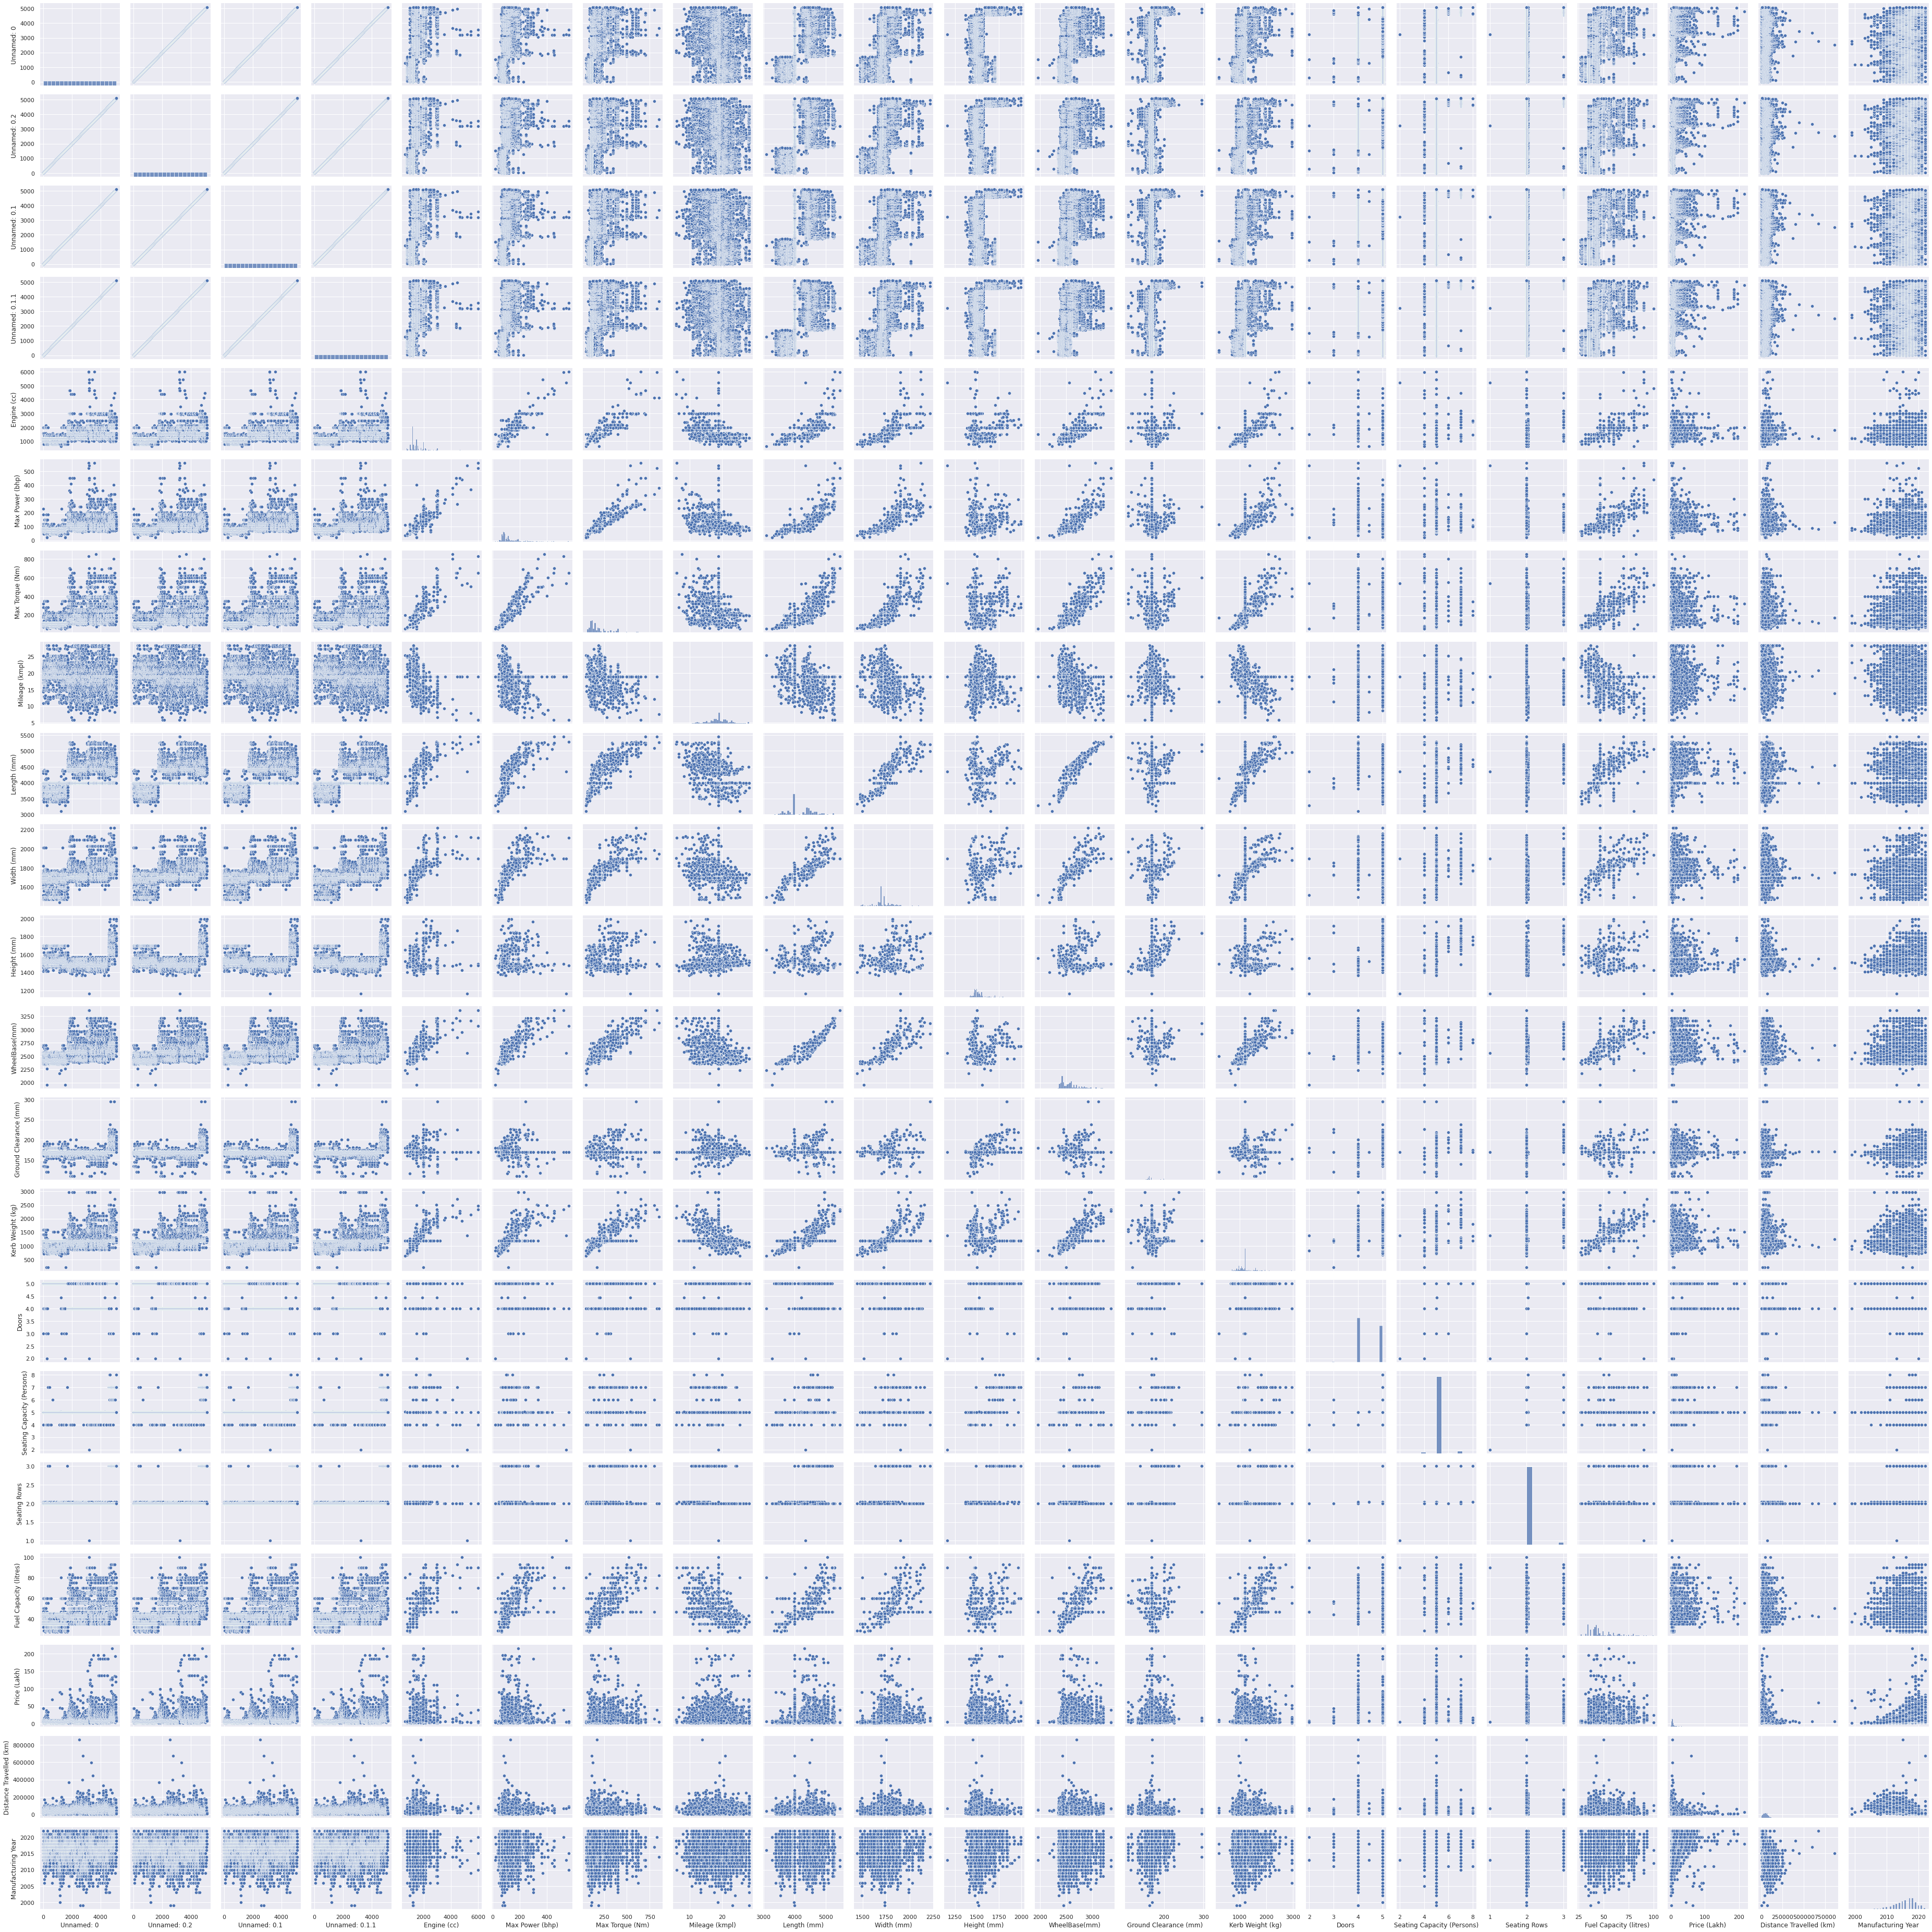

In [ ]:
sns.pairplot(df)

# Correlation

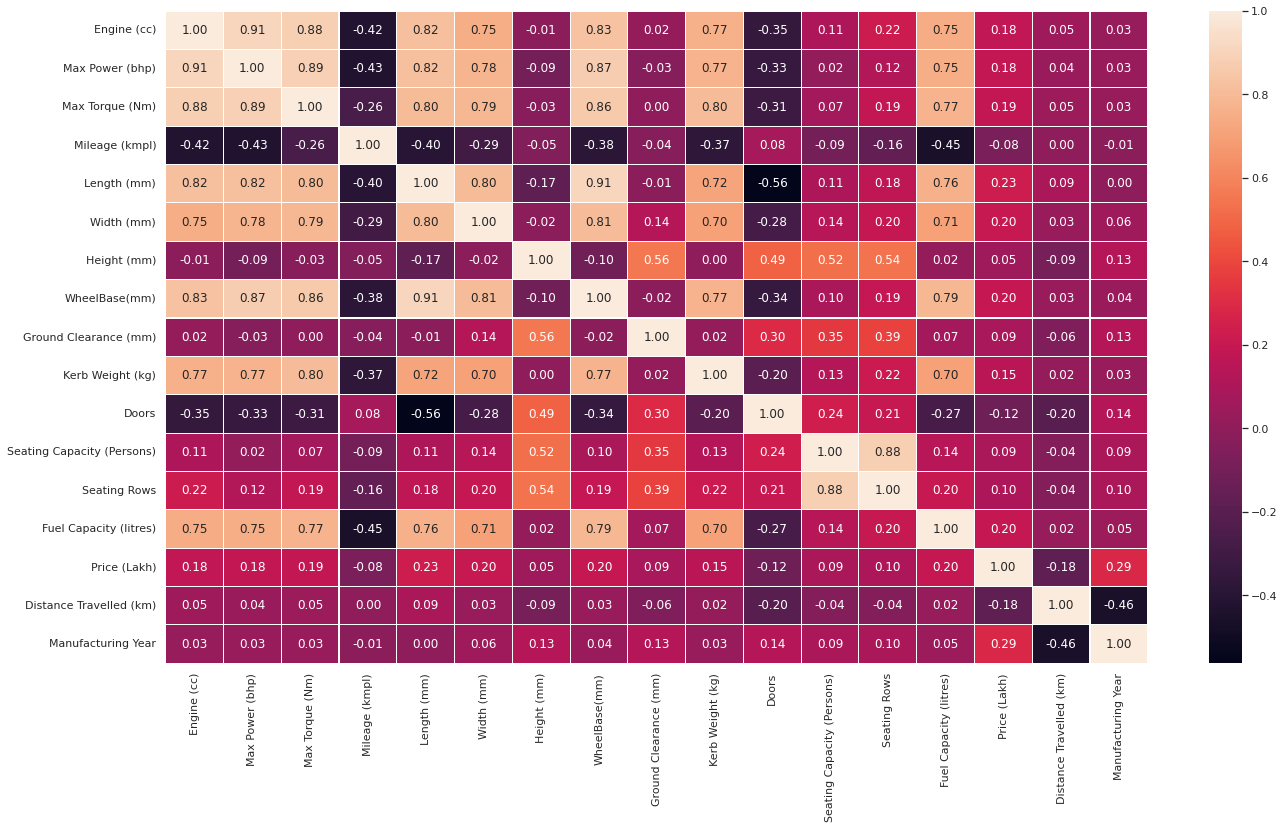

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(df.iloc[:,4:].corr(),annot=True,linewidths=0.1,linecolor='white',fmt="0.2f")

In [ ]:
sp=pd.DataFrame(df.iloc[:,4:].corr())
print("Percent correlation of following features with target column Price\n")
round(sp["Price (Lakh)"]*100)


Percent correlation of following features with target column Price



Engine (cc)                    18.0
Max Power (bhp)                18.0
Max Torque (Nm)                19.0
Mileage (kmpl)                 -8.0
Length (mm)                    23.0
Width (mm)                     20.0
Height (mm)                     5.0
WheelBase(mm)                  20.0
Ground Clearance (mm)           9.0
Kerb Weight (kg)               15.0
Doors                         -12.0
Seating Capacity (Persons)      9.0
Seating Rows                   10.0
Fuel Capacity (litres)         20.0
Price (Lakh)                  100.0
Distance Travelled (km)       -18.0
Manufacturing Year             29.0
Name: Price (Lakh), dtype: float64

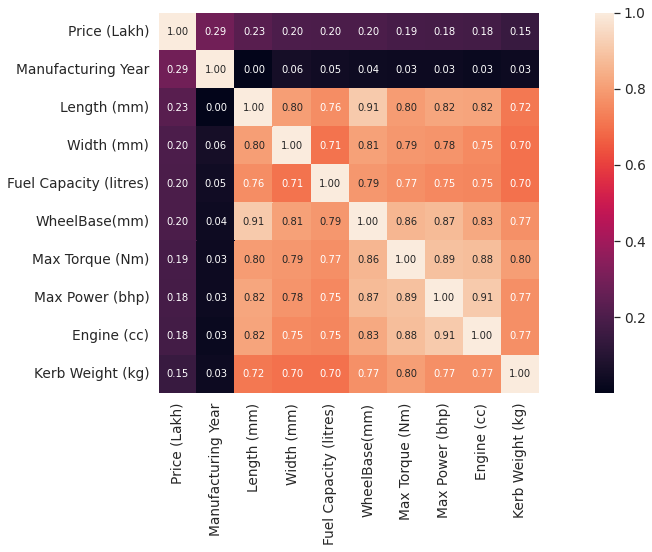

In [ ]:
plt.figure(figsize=(20,7))
k = 10 
cols = df.iloc[:,4:].corr().nlargest(k, "Price (Lakh)")["Price (Lakh)"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


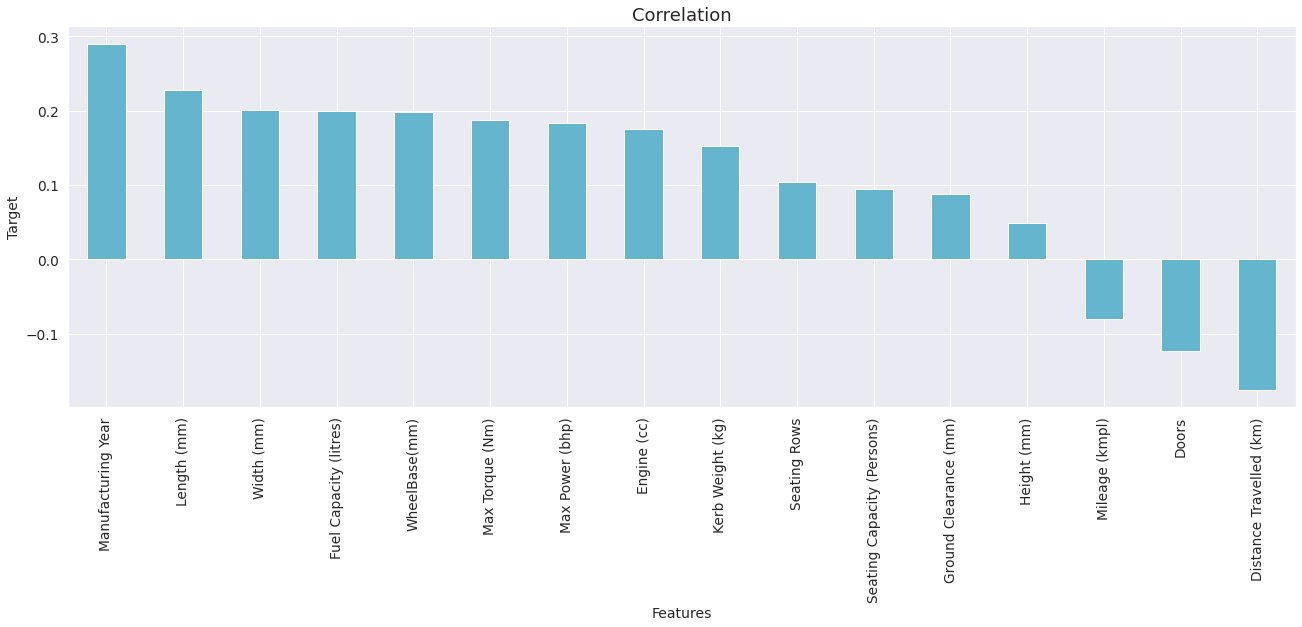

In [ ]:
plt.figure(figsize=(22,7))
df.iloc[:,4:].corr()["Price (Lakh)"].sort_values(ascending=False).drop(["Price (Lakh)"]).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

Negative correlation with traget colum
- Max -ve correlation: Distance Travelled
- Min -ve correlation: Mileage

Positive correlation with traget colum
- Max +ve correlation: Manufacturing Year
- Min +ve correlation: Height

#Describing Data

In [ ]:
df.iloc[:,4:].describe()

Engine (cc)  Max Power (bhp)  Max Torque (Nm)  Mileage (kmpl)  \
count  5099.000000      5099.000000      5099.000000     5099.000000   
mean   1487.614596       112.323692       195.537357       18.867594   
std     494.421339        53.338896       119.728481        3.855729   
min     624.000000        19.850000        51.000000        5.800000   
25%    1197.000000        81.000000       114.000000       16.805000   
50%    1368.000000        89.000000       146.000000       18.867594   
75%    1598.000000       126.000000       250.000000       21.010000   
max    5998.000000       560.000000       850.000000       28.400000   

       Length (mm)   Width (mm)  Height (mm)  WheelBase(mm)  \
count  5099.000000  5099.000000  5099.000000    5099.000000   
mean   4207.768642  1726.544937  1524.943289    2574.431711   
std     423.189792   110.417484    80.657652     180.937316   
min    3099.000000  1440.000000  1165.000000    1958.000000   
25%    3970.000000  1682.000000  1476.000000    2430.000000   
50%    4150.000000  1700.000000  1505.000000    2550.000000   
75%    4490.000000  1777.000000  1544.000000    2650.000000   
max    5453.000000  2220.000000  1995.000000    3365.000000   

       Ground Clearance (mm)  Kerb Weight (kg)        Doors  \
count            5099.000000       5099.000000  5099.000000   
mean              169.052946       1188.708345     4.445447   
std                11.257557        293.492237     0.506690   
min               110.000000        214.000000     2.000000   
25%               165.000000       1020.000000     4.000000   
50%               169.052946       1188.708345     4.000000   
75%               170.000000       1188.708345     5.000000   
max               295.500000       2962.000000     5.000000   

       Seating Capacity (Persons)  Seating Rows  Fuel Capacity (litres)  \
count                 5099.000000   5099.000000             5099.000000   
mean                     5.050628      2.035707               46.478564   
std                      0.386852      0.178831               11.852399   
min                      2.000000      1.000000               27.000000   
25%                      5.000000      2.000000               40.000000   
50%                      5.000000      2.000000               43.000000   
75%                      5.000000      2.000000               50.000000   
max                      8.000000      3.000000              100.000000   

       Price (Lakh)  Distance Travelled (km)  Manufacturing Year  
count   5099.000000               5099.00000         5099.000000  
mean      12.029094              54223.56109         2015.775250  
std       18.069138              39443.59876            3.718741  
min        1.000000                 70.00000         1899.000000  
25%        4.250000              28946.00000         2014.000000  
50%        6.200000              49000.00000         2016.000000  
75%       10.450000              70031.00000         2018.000000  
max      215.000000             860000.00000         2022.000000

- There is huge gap between 75% and Max value which indicates presence of outlier in some of the features.

- Data is widely spread in most of the features.

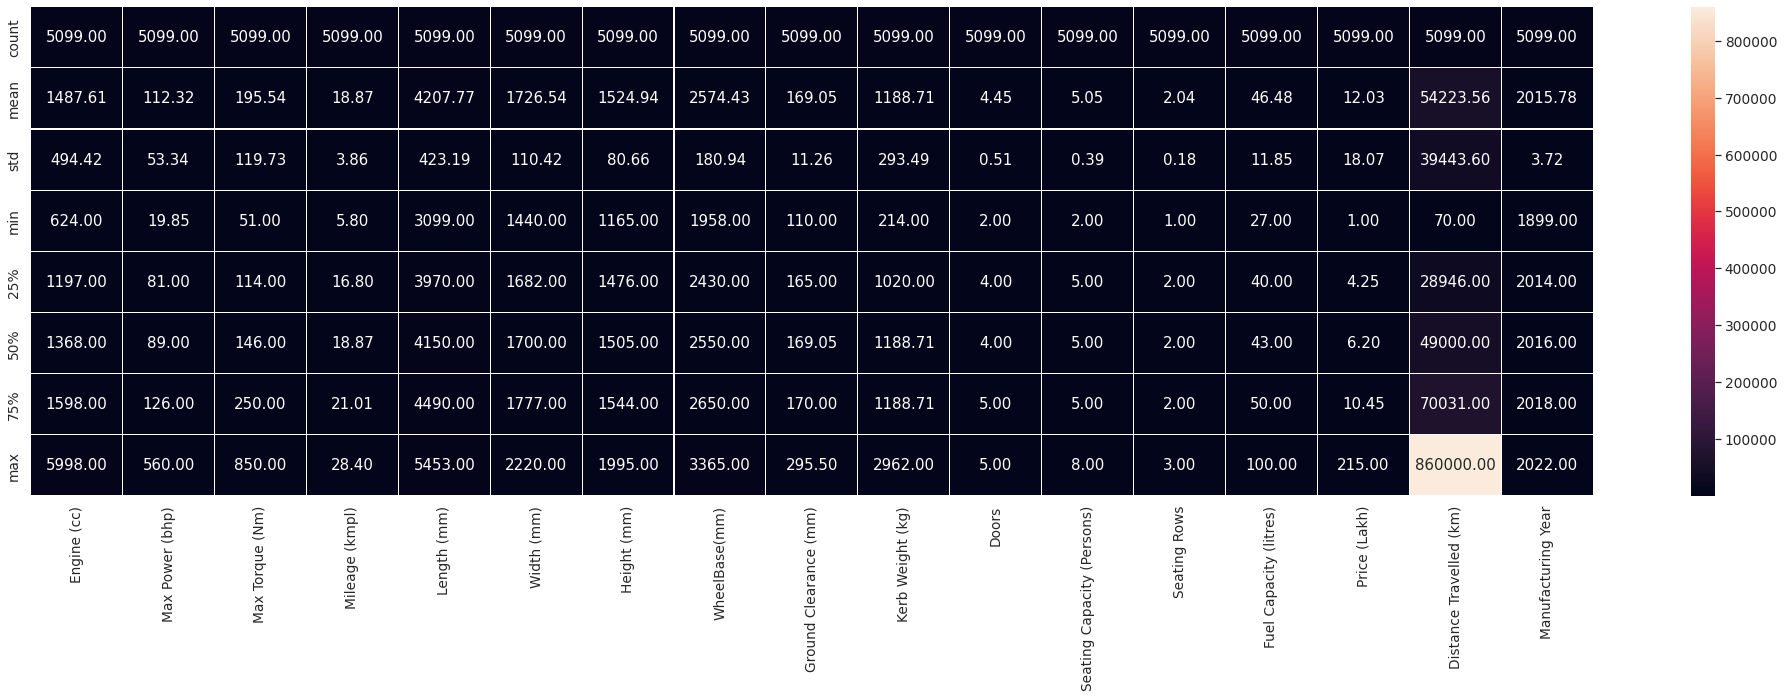

In [ ]:
plt.figure(figsize=(35,9))
sns.heatmap(df.iloc[:,4:].describe(),annot=True,linewidths=0.1,linecolor='white',fmt="0.2f")

# Checking Outliers

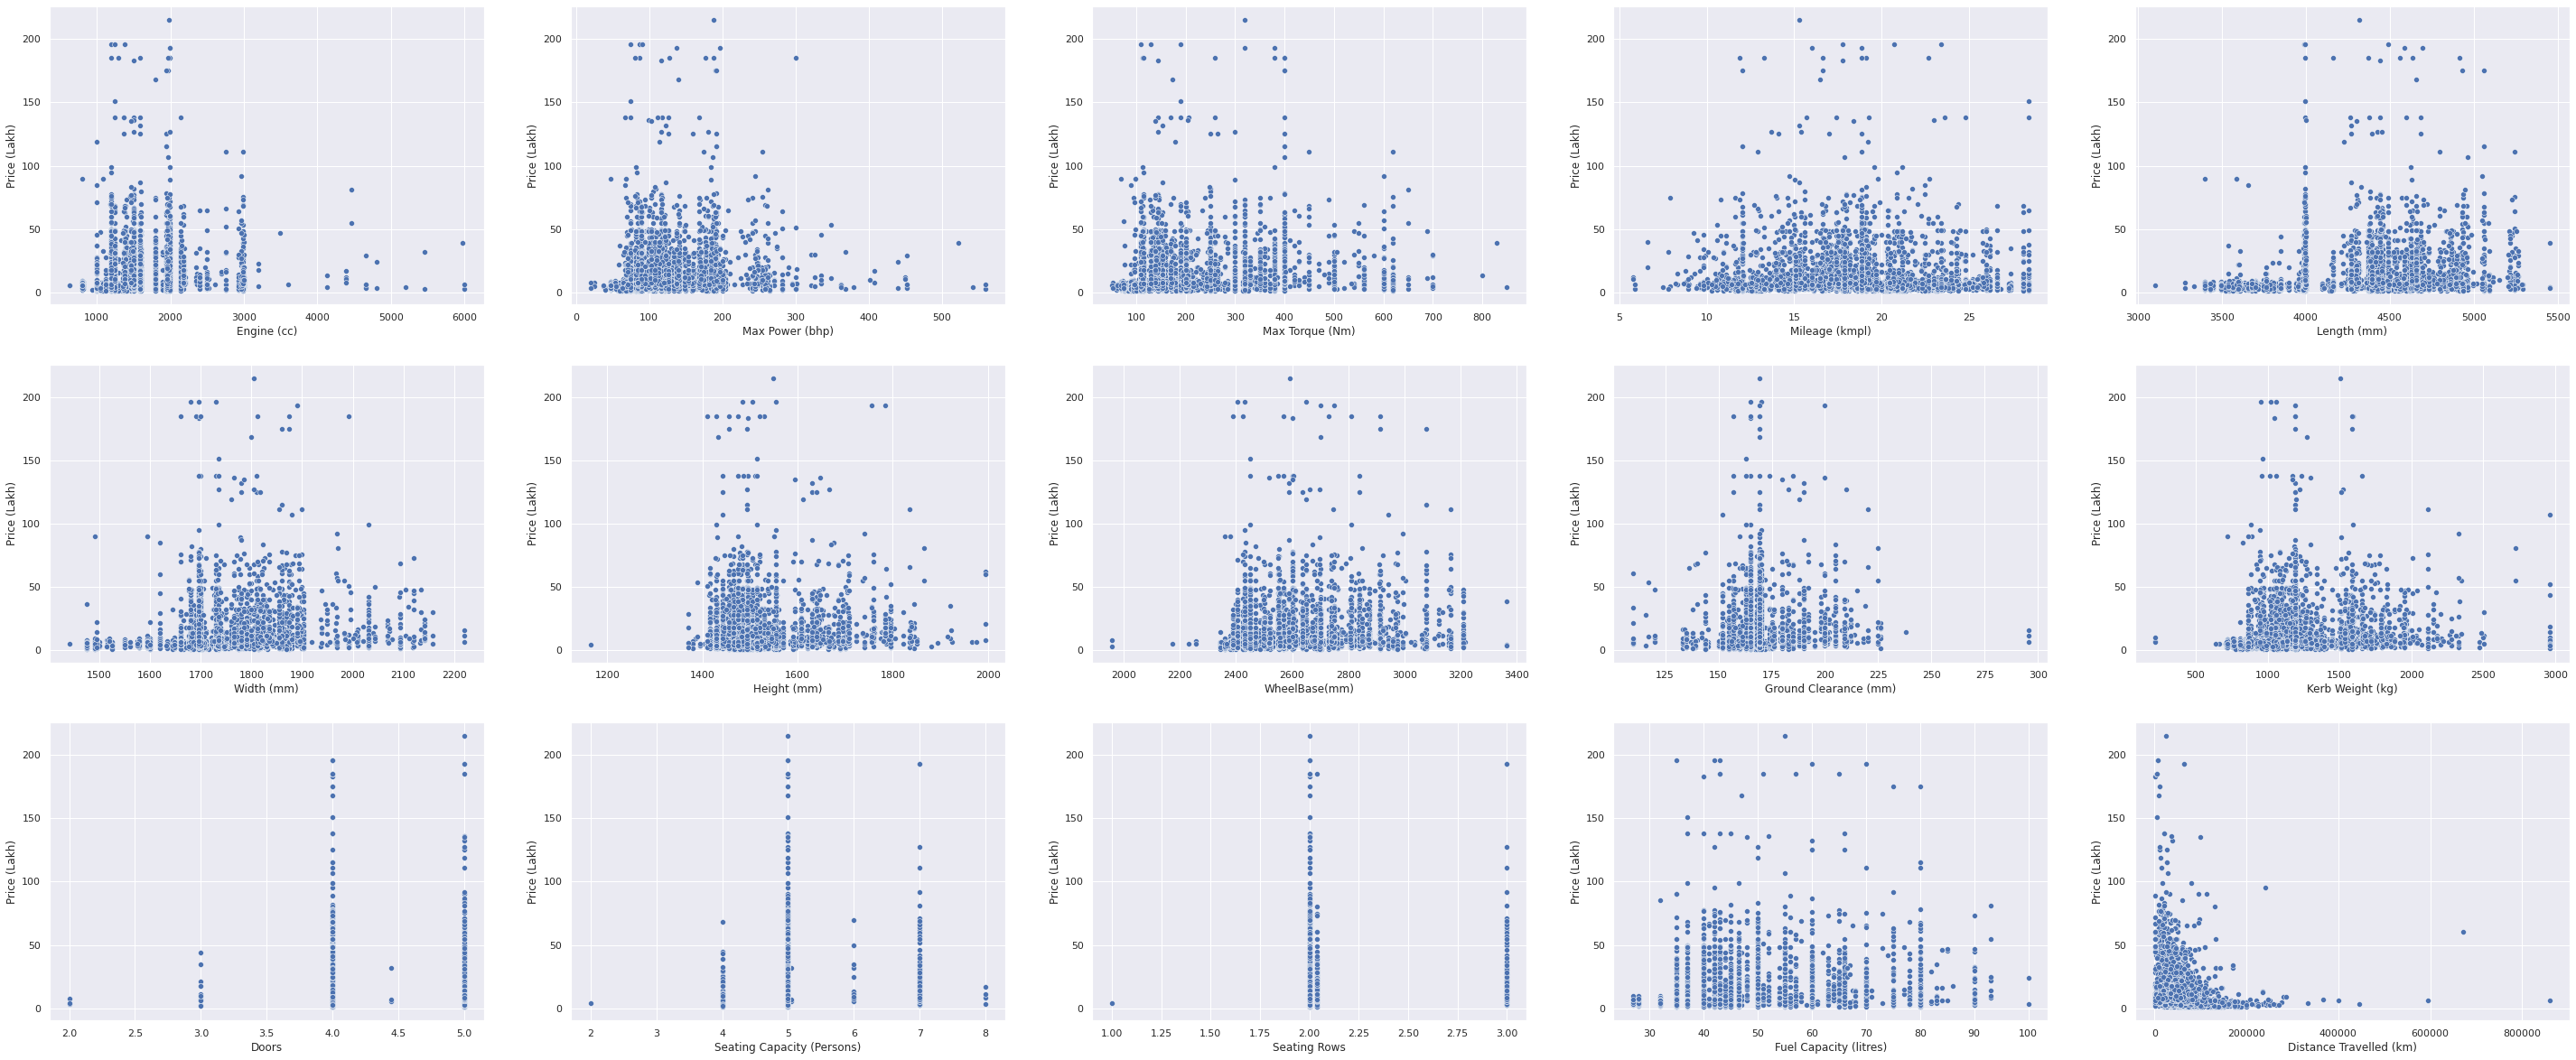

In [ ]:
sns.set()
fig,axes=plt.subplots(3,5,figsize=(50,20))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
list3=["Manufacturing Year","Unnamed: 0","Unnamed: 0.2","Unnamed: 0.1","Unnamed: 0.1.1","Price (Lakh)"]
for i in df:
  if df[i].dtypes!=object and i not in list3:
    sns.scatterplot(x=df[i],y=df["Price (Lakh)"],ax=axes[j,k])
    k=k+1

  
  if k==5:
    k=0
    j=j+1

- Extreme case of outlier are detected in some of the features. The outliers in the above graph indicating that there are cars with good mileage (indicates non luxury cars) available at extremely high rate similarly there are cars with high cc (indicates luxury cars) with extremely cheap rate which can technically be not possible . 

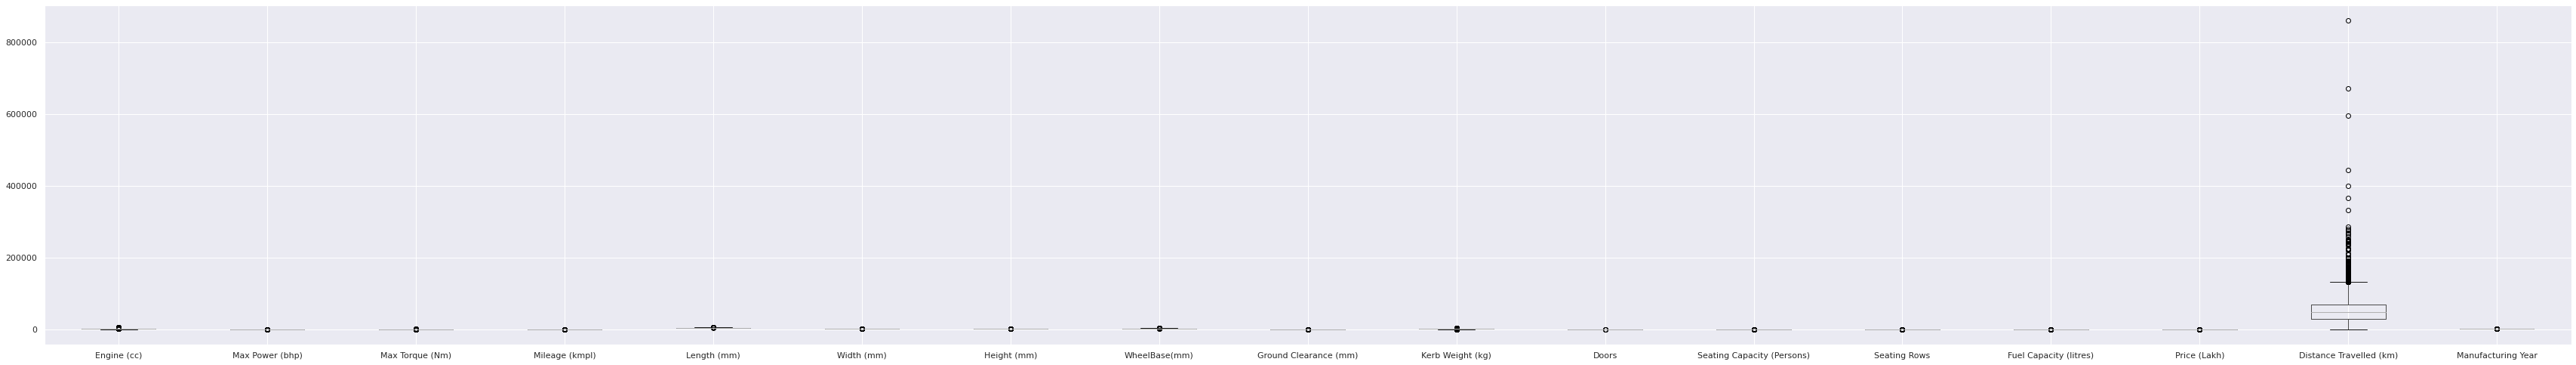

In [ ]:
import matplotlib.pyplot as plt
df.iloc[:,4:].boxplot(figsize=(60,8))
plt.subplots_adjust(bottom=0.1)
plt.show()

The following features contains outliers


In [ ]:
list1=['Engine (cc)',	'Max Power (bhp)','Max Torque (Nm)','Mileage (kmpl)','Length (mm)','Width (mm)','Height (mm)','WheelBase(mm)','Ground Clearance (mm)',
       'Kerb Weight (kg)','Doors','Seating Capacity (Persons)','Seating Rows','Fuel Capacity (litres)','Price (Lakh)','Distance Travelled (km)']

In [ ]:
len(list1)

16

In [ ]:
new_df_cap = df.copy()

In [ ]:
def remove_outliers(n):
    Q1 = np.percentile(df[n], 25, interpolation = 'midpoint')  
    Q3 = np.percentile(df[n], 75, interpolation = 'midpoint') 
    iqr = Q3 - Q1 
    percentile25 = df[n].quantile(0.25)
    percentile75 = df[n].quantile(0.75)
    upper_limit = percentile75 + 1.5 * iqr
    lower_limit = percentile25 - 1.5 * iqr
    df[df[n] > upper_limit]
    df[df[n] < lower_limit]
    
    new_df = df[df[n] < upper_limit]
    new_df.shape
    
    new_df_cap[n] = np.where(
    new_df_cap[n] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap[n] < lower_limit,
        lower_limit,
        new_df_cap[n] ) )
    
    
    

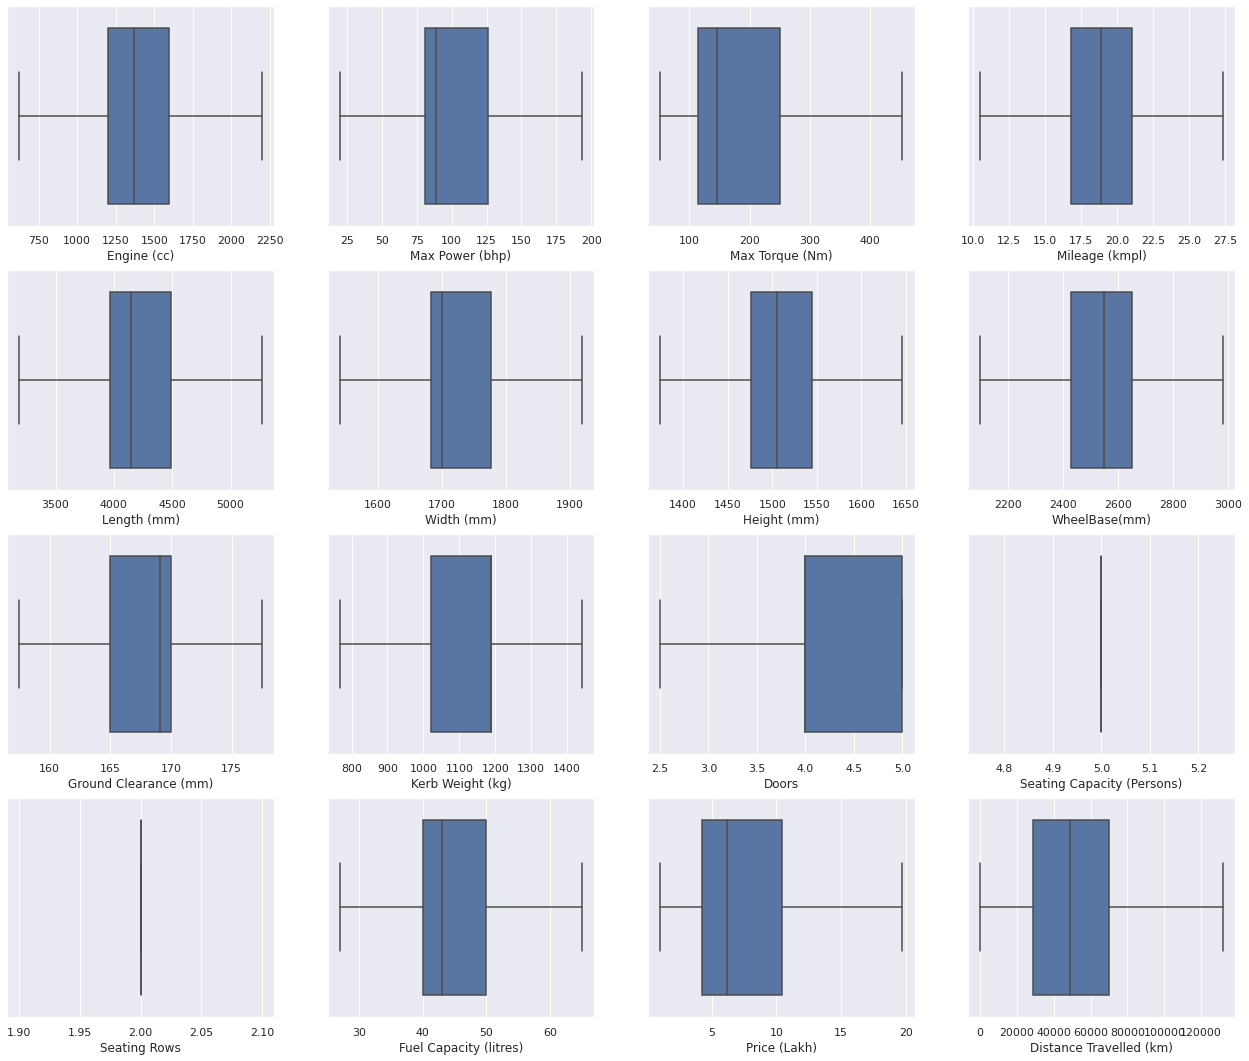

In [ ]:
sns.set()
fig,axes=plt.subplots(4,4,figsize=(22,18))
plt.subplots_adjust(bottom=0.1)
j=0
k=0

for i in list1:
  remove_outliers(i)
  sns.boxplot(new_df_cap[i],ax=axes[j,k])
  k=k+1

  
  if k==4:
    k=0
    j=j+1

  

- 'Seating Capacity (Persons)', 'Seating Rows' contribute only single type of value to target variable, which will not have signifacantly impact and hence we drop these columns.

In [ ]:
new_df_cap=new_df_cap.drop(['Seating Capacity (Persons)','Seating Rows'],axis=1)

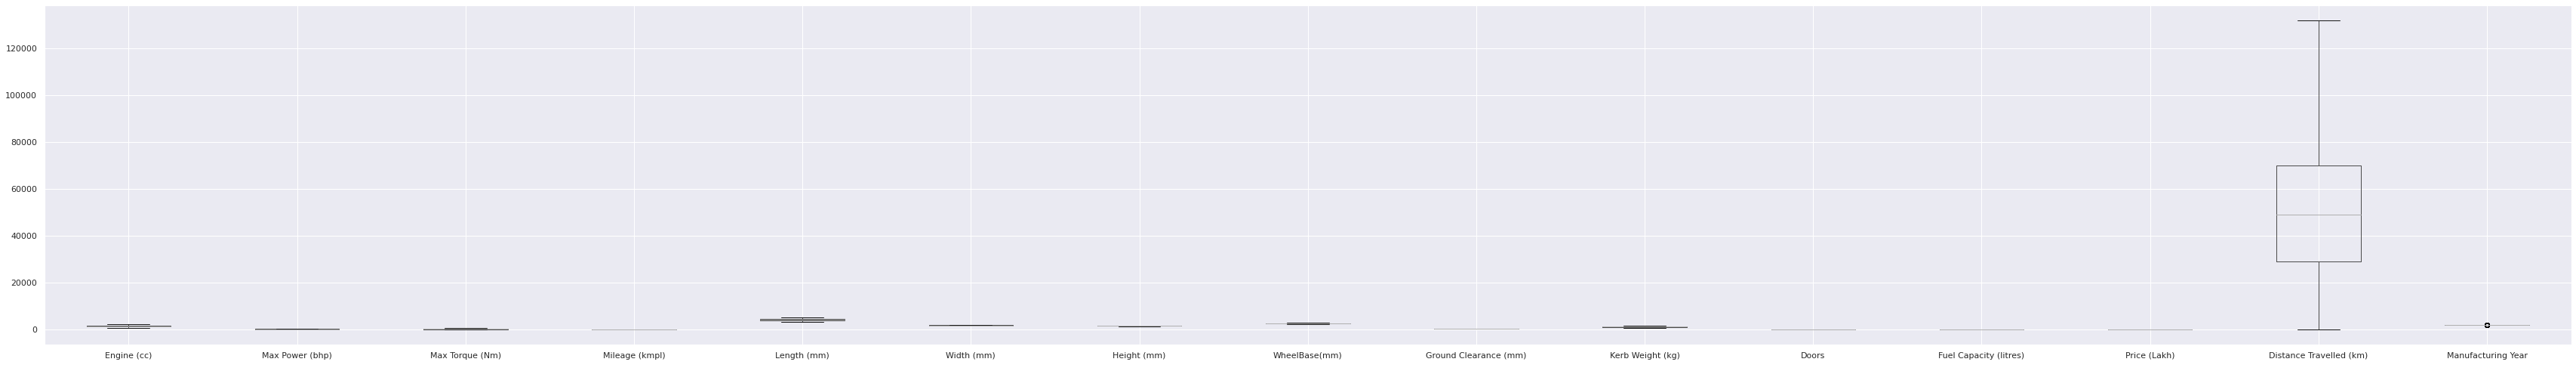

In [ ]:
import matplotlib.pyplot as plt
new_df_cap.iloc[:,4:].boxplot(figsize=(60,8))
plt.subplots_adjust(bottom=0.1)
plt.show()

# EDA Concluding Remarks

- Null values were detected in Engine (cc), Max Power (bhp), Max Torque (Nm),Mileage (kmpl), Length (mm), Width (mm), Height (mm), WheelBase(mm), Ground Clearance (mm), Kerb Weight (kg), Doors, Seating Capacity (Persons), Seating Rows, Fuel Capacity (litres) and Area columns.

- Some features such as Brand, Area, Model Name are redundant for analysis

- The feature with strongest positive correlation with target feature is Manufacturing.

- The feature with strongest negative correlation with target feature is Distance Travelled.

- There are total of 5099 used cars of 32 brands with 1355 different models.

- There 3 different type including sedan, hatchback and SUVs in both luxury and non luxury cars.

- The manufacturing year ranges from 1999 to 2022.

- The car with highest price is of worth 215 lakh (2.5crore) whereas the car with least price is of worth 1 lakh.

- There are cars with engine range between from min 624 cc to max 5998 cc

- 3241 cars are of maual whereas as 1858 are automatic transmission Type

- 4151 cars are individually registered, 114 cars are coporate registered whereas remaining 834 cars registration is not available.

- Highest number of cars run on petrol followed by diesel. 



#Separating input and target features

In [ ]:
x=new_df_cap.drop(["Unnamed: 0","Unnamed: 0.1",'Unnamed: 0.2','Unnamed: 0.1.1',"Price (Lakh)"],axis=1)
x.head()

Engine (cc)  Max Power (bhp)  Max Torque (Nm)  Mileage (kmpl)  Length (mm)  \
0       1197.0             83.0            115.0           20.40       3850.0   
1       1199.0             89.0            110.0           17.10       3989.0   
2        998.0             67.0             90.0           23.10       3600.0   
3       1197.0             79.0            112.0           20.63       3585.0   
4       1198.0             87.0            109.0           19.40       3610.0   

   Width (mm)  Height (mm)  WheelBase(mm)  Ground Clearance (mm)  \
0      1695.0       1530.0         2430.0             170.000000   
1      1694.0       1544.0         2530.0             169.052946   
2      1600.0       1560.0         2425.0             165.000000   
3      1595.0       1550.0         2380.0             165.000000   
4      1680.0       1500.0         2345.0             165.000000   

   Kerb Weight (kg)  ...  Transmission  Previous Owners Insurance Type  \
0        960.000000  ...        Manual            First  Comprehensive   
1       1085.000000  ...     Automatic            First  Comprehensive   
2        810.000000  ...     Automatic            First  Not Available   
3       1188.708345  ...        Manual            First    Third Party   
4        925.000000  ...        Manual            First  Not Available   

   Registration Type   Color Manufacturing Month Manufacturing Year  \
0         Individual    Grey                Jun              2020.0   
1         Individual    Grey                Sep              2021.0   
2         Individual   White                Jun              2016.0   
3         Individual  Silver                Dec              2014.0   
4         Individual   White                Jun              2015.0   

           Brand    City            Area  
0  Maruti Suzuki  Mumbai  Kandivali West  
1          Honda  Mumbai       Khar West  
2  Maruti Suzuki  Mumbai  Kandivali West  
3        Hyundai  Mumbai          Kalina  
4          Honda  Mumbai  Kandivali West  

[5 rows x 25 columns]

In [ ]:
y=new_df_cap["Price (Lakh)"]
y.head()

0     6.75
1    10.25
2     4.85
3     3.10
4     4.25
Name: Price (Lakh), dtype: float64

#Encoding Categorical Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
lenc=LabelEncoder()
for i in x:
  if x[i].dtypes==object:
      x[i]=lenc.fit_transform(x[i].values.reshape(-1,1))

x.head()

Engine (cc)  Max Power (bhp)  Max Torque (Nm)  Mileage (kmpl)  Length (mm)  \
0       1197.0             83.0            115.0           20.40       3850.0   
1       1199.0             89.0            110.0           17.10       3989.0   
2        998.0             67.0             90.0           23.10       3600.0   
3       1197.0             79.0            112.0           20.63       3585.0   
4       1198.0             87.0            109.0           19.40       3610.0   

   Width (mm)  Height (mm)  WheelBase(mm)  Ground Clearance (mm)  \
0      1695.0       1530.0         2430.0             170.000000   
1      1694.0       1544.0         2530.0             169.052946   
2      1600.0       1560.0         2425.0             165.000000   
3      1595.0       1550.0         2380.0             165.000000   
4      1680.0       1500.0         2345.0             165.000000   

   Kerb Weight (kg)  ...  Transmission  Previous Owners  Insurance Type  \
0        960.000000  ...             1                1               0   
1       1085.000000  ...             0                1               0   
2        810.000000  ...             0                1               2   
3       1188.708345  ...             1                1               3   
4        925.000000  ...             1                1               2   

   Registration Type  Color  Manufacturing Month  Manufacturing Year  Brand  \
0                  1     73                    6              2020.0     19   
1                  1     73                   11              2021.0      7   
2                  1    213                    6              2016.0     19   
3                  1    173                    2              2014.0      8   
4                  1    213                    6              2015.0      7   

   City  Area  
0    35   177  
1    35   198  
2    35   177  
3    35   169  
4    35   177  

[5 rows x 25 columns]

# Detecting Skewness

In [ ]:
x.skew().sort_values()

Manufacturing Year        -0.660731
Fuel Type                 -0.591440
Transmission              -0.563751
Manufacturing Month       -0.404124
Color                     -0.321595
City                      -0.227887
Mileage (kmpl)            -0.004887
Ground Clearance (mm)      0.044663
Kerb Weight (kg)           0.052067
Brand                      0.105090
Doors                      0.111204
Width (mm)                 0.166476
Length (mm)                0.249858
Area                       0.279756
Model Name                 0.337413
Insurance Type             0.565394
Engine (cc)                0.611377
Distance Travelled (km)    0.634836
Fuel Capacity (litres)     0.719022
Height (mm)                0.835170
Max Power (bhp)            0.872139
WheelBase(mm)              0.918466
Registration Type          1.007040
Max Torque (Nm)            1.127660
Previous Owners            1.355641
dtype: float64

- Keeping +/- 0.5 as the range of skewness, the numeric features that contain skewness are listed in below list named 'lis'. 


In [ ]:
lis=["WheelBase(mm)","Fuel Capacity (litres)","Max Torque (Nm)","Height (mm)","Max Power (bhp)",   
     "Engine (cc)","Distance Travelled (km)"]

In [ ]:
len(lis)

7

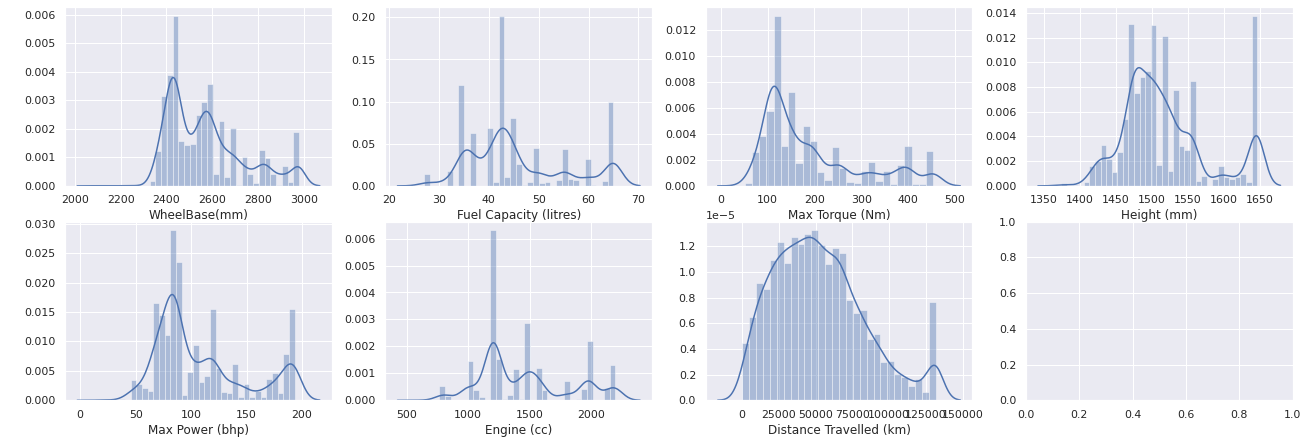

In [ ]:
sns.set()
fig,axes=plt.subplots(2,4,figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
for i in lis:
    sns.distplot(x[i],ax=axes[j,k])
    axes[j,k].set_ylabel(" ")
    k=k+1
    
    if k==4:
      k=0
      j=j+1

All the features are of discrete numeric type

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt=QuantileTransformer()
for i in lis:
  x[i]=qt.fit_transform(x[i].values.reshape(-1,1))

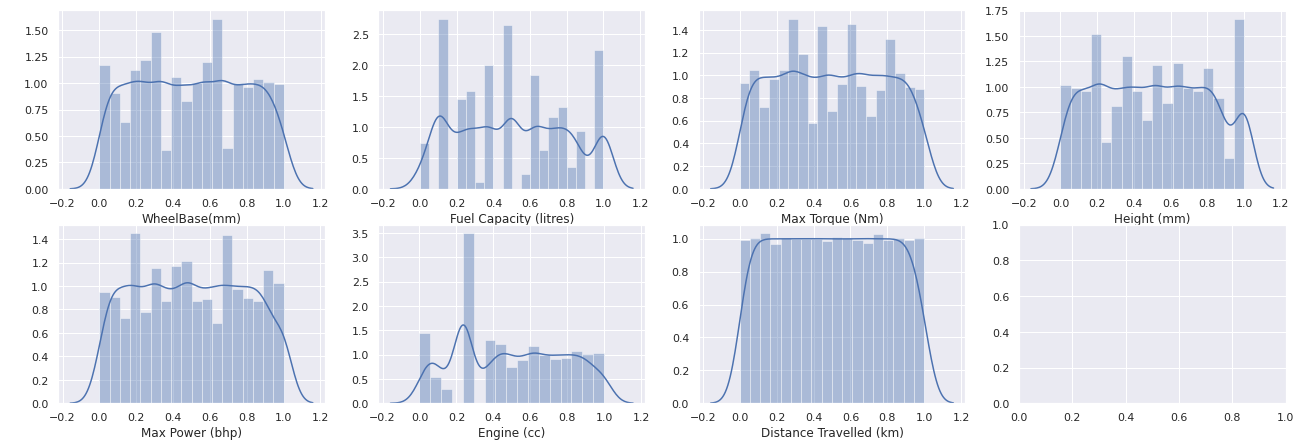

In [ ]:
sns.set()
fig,axes=plt.subplots(2,4,figsize=(22,7))
plt.subplots_adjust(bottom=0.1)
k=0
j=0
for i in lis:
    sns.distplot(x[i],ax=axes[j,k])
    axes[j,k].set_ylabel(" ")
    k=k+1
    
    if k==4:
      k=0
      j=j+1

In [ ]:
x.skew().sort_values()

Manufacturing Year        -0.660731
Fuel Type                 -0.591440
Transmission              -0.563751
Manufacturing Month       -0.404124
Color                     -0.321595
City                      -0.227887
Mileage (kmpl)            -0.004887
Distance Travelled (km)    0.008130
WheelBase(mm)              0.013340
Max Torque (Nm)            0.014758
Max Power (bhp)            0.030894
Ground Clearance (mm)      0.044663
Engine (cc)                0.045453
Kerb Weight (kg)           0.052067
Height (mm)                0.066891
Fuel Capacity (litres)     0.101788
Brand                      0.105090
Doors                      0.111204
Width (mm)                 0.166476
Length (mm)                0.249858
Area                       0.279756
Model Name                 0.337413
Insurance Type             0.565394
Registration Type          1.007040
Previous Owners            1.355641
dtype: float64

# Detecting Multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(x)

variables          VIF
0               Engine (cc)    29.416107
1           Max Power (bhp)    29.437176
2           Max Torque (Nm)    31.516716
3            Mileage (kmpl)    54.790880
4               Length (mm)  1642.891924
5                Width (mm)  2131.563014
6               Height (mm)     7.189632
7             WheelBase(mm)    42.431899
8     Ground Clearance (mm)  1483.069321
9          Kerb Weight (kg)   122.874634
10                    Doors   212.189169
11   Fuel Capacity (litres)    15.940871
12               Model Name     3.435108
13  Distance Travelled (km)     5.093183
14                Fuel Type     4.351564
15             Transmission     3.397050
16          Previous Owners     3.838236
17           Insurance Type     1.802546
18        Registration Type    10.658794
19                    Color     4.291039
20      Manufacturing Month     8.819905
21       Manufacturing Year  4752.892318
22                    Brand     3.856474
23                     City     4.770697
24                     Area     4.355260

- Vif>5 indicates multicollinearity
- "Width (mm)","Ground Clearance (mm)","Doors" were dropped since they had high VIF value and when compared to Manufacturing Year and Length (Which are the other two features with high VIF value) contributed less towards target variable.

In [ ]:
X=x.drop(["Width (mm)","Ground Clearance (mm)","Doors"],axis=1)
calc_vif(X)

variables          VIF
0               Engine (cc)    28.933017
1           Max Power (bhp)    27.596874
2           Max Torque (Nm)    30.415728
3            Mileage (kmpl)    53.139658
4               Length (mm)  1212.417477
5               Height (mm)     4.951045
6             WheelBase(mm)    33.768450
7          Kerb Weight (kg)   119.088703
8    Fuel Capacity (litres)    15.317653
9                Model Name     3.426752
10  Distance Travelled (km)     5.055619
11                Fuel Type     4.315395
12             Transmission     3.356379
13          Previous Owners     3.837430
14           Insurance Type     1.802352
15        Registration Type    10.440959
16                    Color     4.285835
17      Manufacturing Month     8.812075
18       Manufacturing Year  1137.062274
19                    Brand     3.845588
20                     City     4.702090
21                     Area     4.345746

#Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mns=MinMaxScaler()
s=mns.fit_transform(X)
x=pd.DataFrame(data=s)

- Since the data doesn’t have Gaussian distribution, we use normalization technique to rescale the data. 

#Training 

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
for i in range(100):
  x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
  lr.fit(x,y)
  pred_train=lr.predict(x_train)
  pred_test=lr.predict(x_test)
  print("At Random State : ",i)
  print("Training r2: ",round(r2_score(y_train,pred_train)*100,2))
  print("Testing r2: ",round(r2_score(y_test,pred_test)*100,2))
  print("\n")

At Random State :  0
Training r2:  65.24
Testing r2:  63.41


At Random State :  1
Training r2:  64.1
Testing r2:  68.1


At Random State :  2
Training r2:  66.01
Testing r2:  60.22


At Random State :  3
Training r2:  64.88
Testing r2:  64.97


At Random State :  4
Training r2:  64.6
Testing r2:  66.08


At Random State :  5
Training r2:  65.54
Testing r2:  62.4


At Random State :  6
Training r2:  65.34
Testing r2:  63.0


At Random State :  7
Training r2:  65.01
Testing r2:  64.39


At Random State :  8
Training r2:  65.19
Testing r2:  63.74


At Random State :  9
Training r2:  63.51
Testing r2:  69.91


At Random State :  10
Training r2:  65.19
Testing r2:  63.63


At Random State :  11
Training r2:  65.23
Testing r2:  63.56


At Random State :  12
Training r2:  64.56
Testing r2:  66.3


At Random State :  13
Training r2:  64.68
Testing r2:  65.67


At Random State :  14
Training r2:  64.52
Testing r2:  66.43


At Random State :  15
Training r2:  64.86
Testing r2:  65.01


At Rando

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=95)
lr.fit(x,y)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
print("Training r2: ",round(r2_score(y_train,pred_train)*100,2))
print("Testing r2: ",round(r2_score(y_test,pred_test)*100,2))
print("\n")
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_test))
print("mean_squared_error: ",mean_squared_error(y_test,pred_test))
print("Root mean_square: ",np.sqrt(mean_squared_error(y_test,pred_test)))

Training r2:  65.35
Testing r2:  63.06


mean_absolute_error:  2.623941694261641
mean_squared_error:  12.053367355519674
Root mean_square:  3.471795984144183


#Cross Validation

In [ ]:
ls=r2_score(y_test,pred_test)
for j in range(2,10):
  cv_score=cross_val_score(lr,x,y,cv=j)
  print(cv_score)
  print("At cv: ",j)
  print("Cross Validation Score: ",round(cv_score.mean()*100,2))
  print("r2 Score: ",round(ls*100,2))
  print("\n")

[0.03839211 0.52171292]
At cv:  2
Cross Validation Score:  28.01
r2 Score:  63.06


[-1.46788654  0.60578941  0.50087109]
At cv:  3
Cross Validation Score:  -12.04
r2 Score:  63.06


[-0.69624843  0.59156936  0.60341401  0.4935362 ]
At cv:  4
Cross Validation Score:  24.81
r2 Score:  63.06


[-0.60144232  0.50762417  0.42187845  0.62480155  0.49669695]
At cv:  5
Cross Validation Score:  28.99
r2 Score:  63.06


[-0.38988751 -0.41486014  0.61851551  0.60217866  0.62240706  0.44516897]
At cv:  6
Cross Validation Score:  24.73
r2 Score:  63.06


[-0.27328945 -0.77850233  0.63937321  0.2180463   0.67380738  0.61611201
  0.37809719]
At cv:  7
Cross Validation Score:  21.05
r2 Score:  63.06


[-0.22516036 -1.20606875  0.44036391  0.63117773  0.24593991  0.61009417
  0.62487223  0.31733224]
At cv:  8
Cross Validation Score:  17.98
r2 Score:  63.06


[-0.16327369 -1.20781556 -0.34267152  0.62783738  0.24286573  0.66685623
  0.61261645  0.65524043  0.24836575]
At cv:  9
Cross Validation Score: 

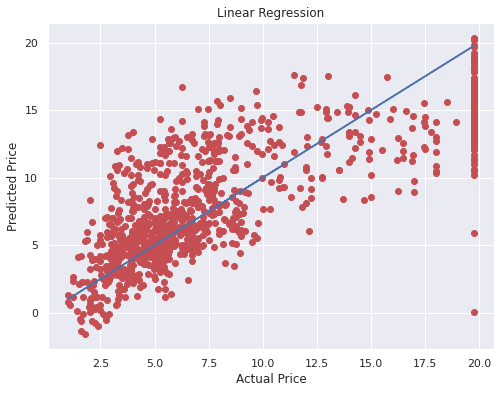

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression")
plt.show()

# Regularization

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

parameters={'alpha':[.00001,.0001,.001,.01,.1,1,10],
            'random_state': list(range(0,10)),
            'selection':['cyclic', 'random'],
            'fit_intercept': ['True','False']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 0.001, 'fit_intercept': 'True', 'random_state': 2, 'selection': 'random'}


In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.001,random_state=2,fit_intercept=True,selection='random')
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print("Training Accuracy: ",round(ls_score_train*100,2))

lss=r2_score(y_test,pred_ls)
print("Testing Accuracy: ",round(lss*100,2))

cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
print("Cross Validation Score: ",round(cv_mean*100,2))

Training Accuracy:  65.41
Testing Accuracy:  62.54
Cross Validation Score:  28.29


In [ ]:
from sklearn.linear_model import Lasso
ls=Lasso(alpha=0.0001,random_state=0,fit_intercept=True,selection='random')
ls.fit(x_train,y_train)
ls_score_train=ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)
print("Training Accuracy: ",round(ls_score_train*100,2))

Training Accuracy:  64.73


In [ ]:
lss=r2_score(y_test,pred_ls)
print("Testing Accuracy: ",round(lss*100,2))

Testing Accuracy:  55.72


In [ ]:
cv_score=cross_val_score(ls,x,y,cv=2)
cv_mean=cv_score.mean()
print("Cross Validation Score: ",round(cv_mean*100,2))

Cross Validation Score:  33.31


#Model Selection

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

def model_selection(algorithm_instance,x_train,y_train,x_test,y_test):
    algorithm_instance.fit(x_train,y_train)
    model_pred_train=algorithm_instance.predict(x_train)
    model_pred_test=algorithm_instance.predict(x_test)
    print("Accuracy of training model :",round(r2_score(y_train,model_pred_train)*100,2))
    print("Accuracy of test data :",round(r2_score(y_test,model_pred_test)*100,2))
    rfscore=cross_val_score(algorithm_instance,x,y,cv=8)
    rfc=rfscore.mean()
    print('Cross Val Score:',round(rfc*100,2))
    print("\nMean Absolute Error ",mean_absolute_error(y_test,model_pred_test))
    print("Mean Sq. Error ",mean_squared_error(y_test,model_pred_test))
    print("Root Mean Sq ",np.sqrt(mean_squared_error(y_test,model_pred_test)))
    print("\n")

# SVR

In [ ]:
from sklearn import svm

k=svm.SVR()
model_selection(k,x_train,y_train,x_test,y_test)

Accuracy of training model : 72.44
Accuracy of test data : 70.29
Cross Val Score: 45.73

Mean Absolute Error  2.021452137267891
Mean Sq. Error  9.693836556155182
Root Mean Sq  3.1134926619722716




# XGBOOST

In [ ]:
import xgboost as xg
xgb = xg.XGBRegressor()
model_selection(xgb,x_train,y_train,x_test,y_test)

[10:10:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Accuracy of training model : 90.1
Accuracy of test data : 86.9
[10:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:10:57] WARNING: /workspace/src/objective/reg

# RandomForestRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameter={'criterion':['mse','mae'],
          'max_features' : ["auto","sqrt","log2"],
          'n_estimators':range(0,100,25)}

rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto', 'n_estimators': 75}


In [ ]:
rf=RandomForestRegressor(criterion='mse',max_features="auto", n_estimators=75)
model_selection(rf,x_train,y_train,x_test,y_test)

Accuracy of training model : 98.49
Accuracy of test data : 88.59
Cross Val Score: 67.75

Mean Absolute Error  1.0799747712418302
Mean Sq. Error  3.5775527142657957
Root Mean Sq  1.8914419669304674




# AdaBoostRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

parameter={'loss':['linear', 'square', 'exponential'],
          'random_state' : range(0,100,25),
           'learning_rate':[0,1.0],
           'n_estimators':range(0,100,25)}

rf2=AdaBoostRegressor()
clf=GridSearchCV(rf2,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'learning_rate': 1.0, 'loss': 'exponential', 'n_estimators': 25, 'random_state': 75}


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
rf2=AdaBoostRegressor(learning_rate= 1.0, loss= 'exponential', n_estimators= 25, random_state= 75)
model_selection(rf2,x_train,y_train,x_test,y_test)

Accuracy of training model : 67.81
Accuracy of test data : 63.32
Cross Val Score: 17.01

Mean Absolute Error  2.749934536940478
Mean Sq. Error  11.499459354235276
Root Mean Sq  3.3910852767565838




# GradientBoostingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

parameter={'loss':['squared_error', 'absolute_error', 'huber','quantile'],
          'criterion':['friedman_mse', 'squared_error', 'mse'],
           'learning_rate':[0,1.0],
           'n_estimators':range(0,100,25)}

rf3=GradientBoostingRegressor()
clf=GridSearchCV(rf3,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'friedman_mse', 'learning_rate': 1.0, 'loss': 'huber', 'n_estimators': 50}


In [ ]:
rf3=GradientBoostingRegressor(learning_rate= 1.0, loss= 'huber', n_estimators= 50, criterion=  'friedman_mse')
model_selection(rf3,x_train,y_train,x_test,y_test)

Accuracy of training model : 93.75
Accuracy of test data : 84.24
Cross Val Score: 64.88

Mean Absolute Error  1.3058981262709677
Mean Sq. Error  4.941989513250324
Root Mean Sq  2.2230585942008645




# BaggingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor

parameter={'oob_score':['True','False'],
          'n_jobs':range(0,10,2),
           'random_state':range(0,100,25),
           'n_estimators':range(0,100,25)}

rf4=BaggingRegressor()
clf=GridSearchCV(rf4,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_estimators': 75, 'n_jobs': 2, 'oob_score': 'True', 'random_state': 0}


In [ ]:
rf4=BaggingRegressor(oob_score= True, n_jobs= 2, n_estimators= 75, random_state= 0)
model_selection(rf4,x_train,y_train,x_test,y_test)

Accuracy of training model : 98.48
Accuracy of test data : 88.93
Cross Val Score: 67.03

Mean Absolute Error  1.054331633986928
Mean Sq. Error  3.4717681165490193
Root Mean Sq  1.863268127927116




# VotingRegressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

estimators = [ ('knc', KNeighborsRegressor()), ('svr',SVR()) ]
parameter={
          'n_jobs':range(0,10,2),
           'verbose':[True,False]
          }

rf5=VotingRegressor(estimators)
clf=GridSearchCV(rf5,parameter)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'n_jobs': 2, 'verbose': True}


In [ ]:
rf5=VotingRegressor(estimators, n_jobs= 2, verbose= True)
model_selection(rf5,x_train,y_train,x_test,y_test)

Accuracy of training model : 77.38
Accuracy of test data : 70.12
Cross Val Score: 44.89

Mean Absolute Error  2.0811139743255507
Mean Sq. Error  9.750236300030377
Root Mean Sq  3.122536837257549




#Saving Model

In [ ]:
import pickle
filename='rfz.pk1'
pickle.dump(rf4,open(filename,'wb'))

- Bagging Regressor model was choosen since it has the lowest Mean Absolute Error among all the tested model.

#Loading Saved Model

In [ ]:
loaded_model=pickle.load(open('rfz.pk1','rb'))
result=loaded_model.score(x_test,y_test)
print("\nModel Accuracy:",result*100)
pred_decision=rf4.predict(x_test)


Model Accuracy: 88.92564317145626


# Testing Loaded Model

In [ ]:
conc=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted Price","Actual Price"])
conc

0       1          2         3       4         5     \
Predicted Price  5.452267  4.3948  11.254533  7.472533  7.1864  6.998133   
Actual Price     5.452267  4.3948  11.254533  7.472533  7.1864  6.998133   

                     6         7       8         9     ...      1010  \
Predicted Price  7.370933  3.061333  6.1316  6.342933  ...  7.558133   
Actual Price     7.370933  3.061333  6.1316  6.342933  ...  7.558133   

                     1011       1012      1013      1014    1015      1016  \
Predicted Price  5.927867  16.674667  5.116533  7.067867  6.1676  5.178267   
Actual Price     5.927867  16.674667  5.116533  7.067867  6.1676  5.178267   

                     1017      1018      1019  
Predicted Price  6.990533  7.655333  5.441467  
Actual Price     6.990533  7.655333  5.441467  

[2 rows x 1020 columns]

#Conclusion

-	In this study we found that bagging regression algorithm performs slightly better than rest of the algorithm tested.

-	Length, width, wheelbase, engine, kerb weight, manufacturing year, fuel capacity, max power, max torque are the top features of the used cars that highly impact the sale price among all the features in the dataset.
